# Problem Statement
### This project is used to predict the price of the gemstone considering various aspects of the gemstone properties like, carat, cut, color, depth, table, x, y and z

### Data Collection
##### https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv
##### The dataset has 11 features and 193573 rows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('train.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.shape

(193573, 11)

#### Data Checks to perform

 - Check Missing values
 - Check Duplicates
 - Check data type
 - Check the number of unique values of each column
 - Check statistics of data set
 - Check various categories present in the different categorical column

##### Missing Values

In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

##### Duplicate Values

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


#### Insights
- The carat values mostly lies between 0.2 to 3.5
- The minimum and maximum values of depth and table features are almost same
- The standard deviation of all the features are below 2 except price feature


#### Exploring Data

In [8]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


##### Dropping id feature

In [9]:
df2=df.drop('id',axis=1)
df2

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


##### cut and color and clarity categorical features

In [10]:
cut_feat = df.cut.unique()
print("Categories in cut feature: ",cut_feat)

Categories in cut feature:  ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']


In [11]:
df.cut.value_counts(ascending=False)

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [12]:
color_feat = df.color.unique()
print("Categories in color feature: ",color_feat)

Categories in color feature:  ['F' 'J' 'G' 'E' 'D' 'H' 'I']


In [13]:
df.color.value_counts(ascending=False)

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [14]:
clarity_feat = df.clarity.unique()
print("Categories in clarity feature: ",clarity_feat)

Categories in clarity feature:  ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [15]:
df.clarity.value_counts(ascending=False)

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [16]:
#### Defining categorical and numerical features
cat_feature=[feature for feature in df2.columns if df2[feature].dtype=='O']
num_feature=[feature for feature in df2.columns if df2[feature].dtype!='O']

print("There are {} categorical features :{} ".format(len(cat_feature),cat_feature))
print("There are {} numerical features :{}  ".format(len(num_feature),num_feature))

There are 3 categorical features :['cut', 'color', 'clarity'] 
There are 7 numerical features :['carat', 'depth', 'table', 'x', 'y', 'z', 'price']  


# 4.1.1 Histogram & KDE

# Exploring and visualizing Data

C:\Users\guddu\AppData\Local\Temp\ipykernel_72680\1166731535.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


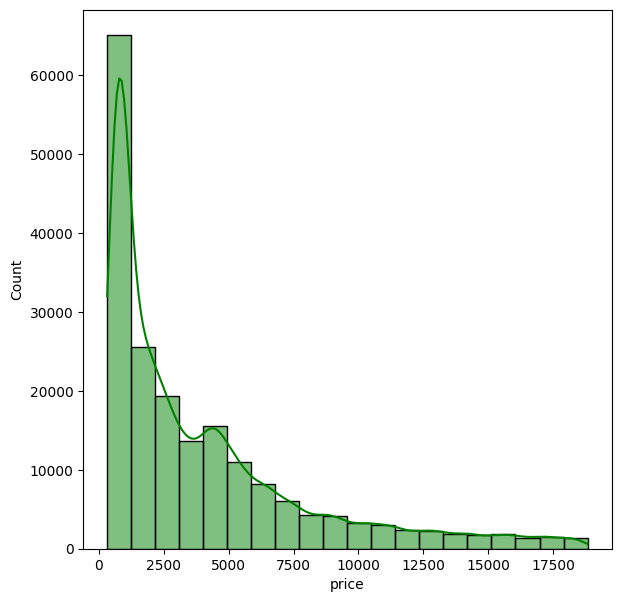

In [17]:
fig, axs = plt.subplots(1,1, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df2,x='price',bins=20,kde=True,color='g')
plt.show()

##### The gemstone price is mostly below 5000

C:\Users\guddu\AppData\Local\Temp\ipykernel_72680\2917344950.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)


"\nplt.subplot(322)\nsns.histplot(data=df2[df2.cut=='Premium'],x='price',kde=True,color='b')\nplt.subplot(323)\nsns.histplot(data=df2[df2.cut=='Very Good'],x='price',kde=True,color='r')\nplt.subplot(324)\nsns.histplot(data=df2[df2.cut=='Ideal'],x='price',kde=True,color='g')\nplt.subplot(325)\nsns.histplot(data=df2[df2.cut=='Good'],x='price',kde=True,color='y')\nplt.subplot(326)\nsns.histplot(data=df2[df2.cut=='Fair'],x='price',kde=True,color='m')\nplt.show()\n"

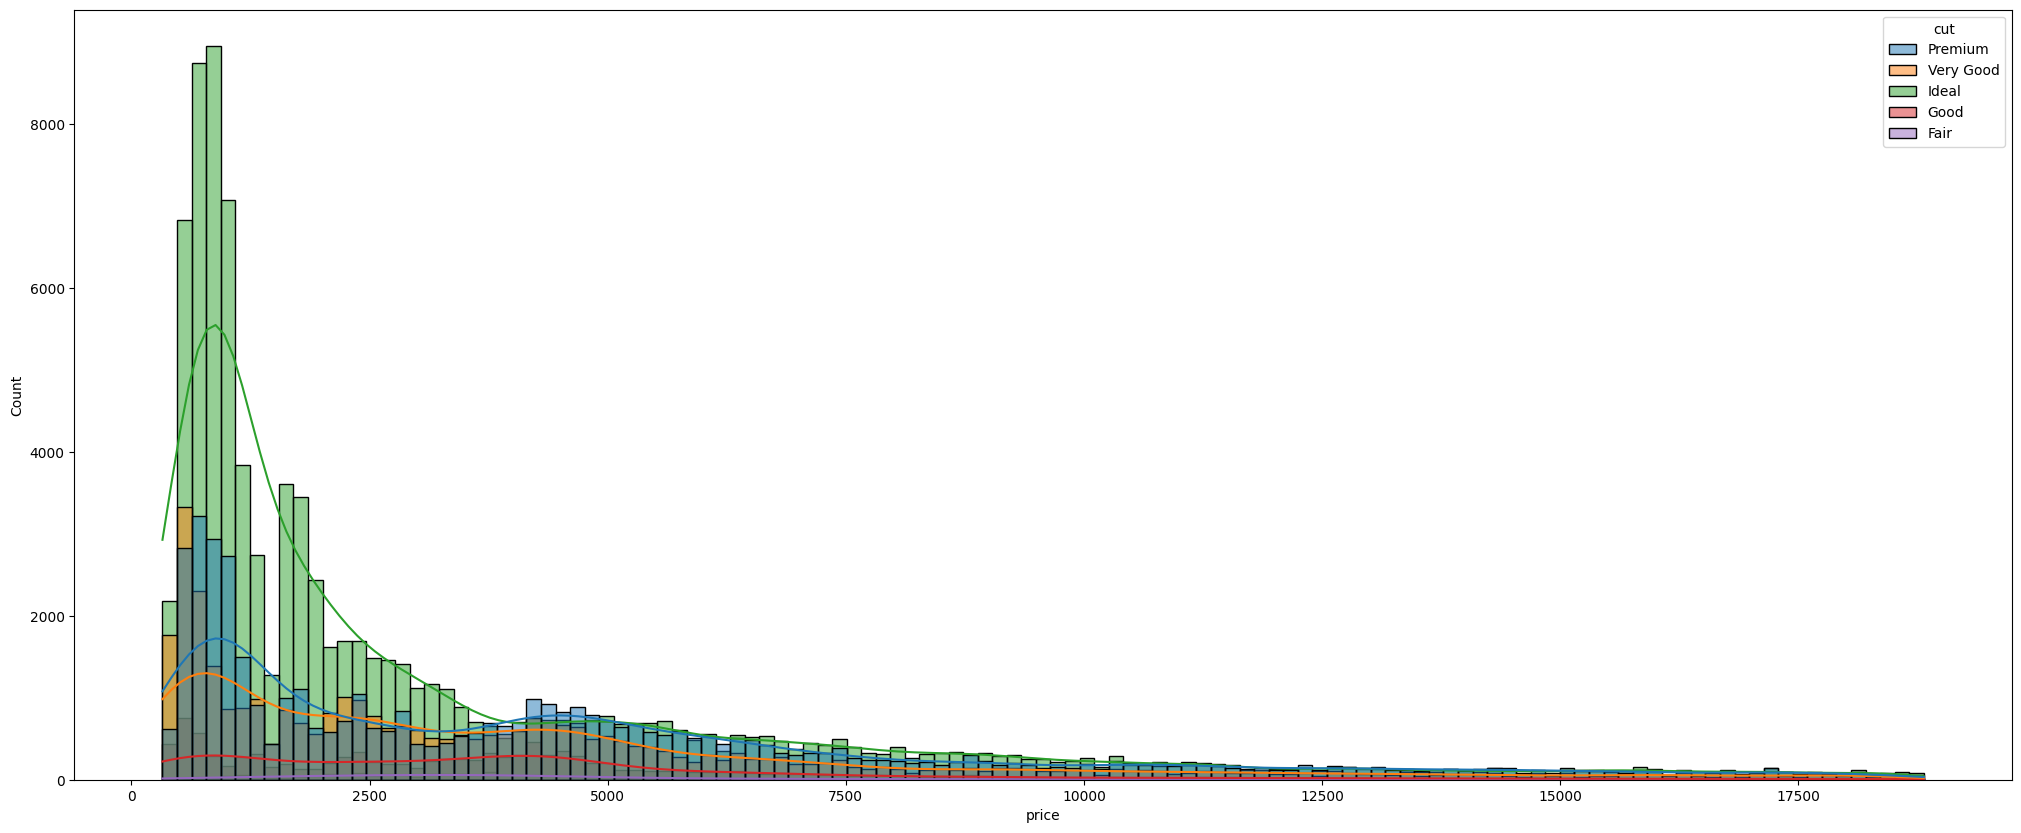

In [18]:
plt.subplots(1,2,figsize=(25,10))
plt.subplot(111)
sns.histplot(data=df2,x='price',kde=True,hue='cut')
'''
plt.subplot(322)
sns.histplot(data=df2[df2.cut=='Premium'],x='price',kde=True,color='b')
plt.subplot(323)
sns.histplot(data=df2[df2.cut=='Very Good'],x='price',kde=True,color='r')
plt.subplot(324)
sns.histplot(data=df2[df2.cut=='Ideal'],x='price',kde=True,color='g')
plt.subplot(325)
sns.histplot(data=df2[df2.cut=='Good'],x='price',kde=True,color='y')
plt.subplot(326)
sns.histplot(data=df2[df2.cut=='Fair'],x='price',kde=True,color='m')
plt.show()
'''

C:\Users\guddu\AppData\Local\Temp\ipykernel_72680\149077136.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)


<Axes: xlabel='price', ylabel='Count'>

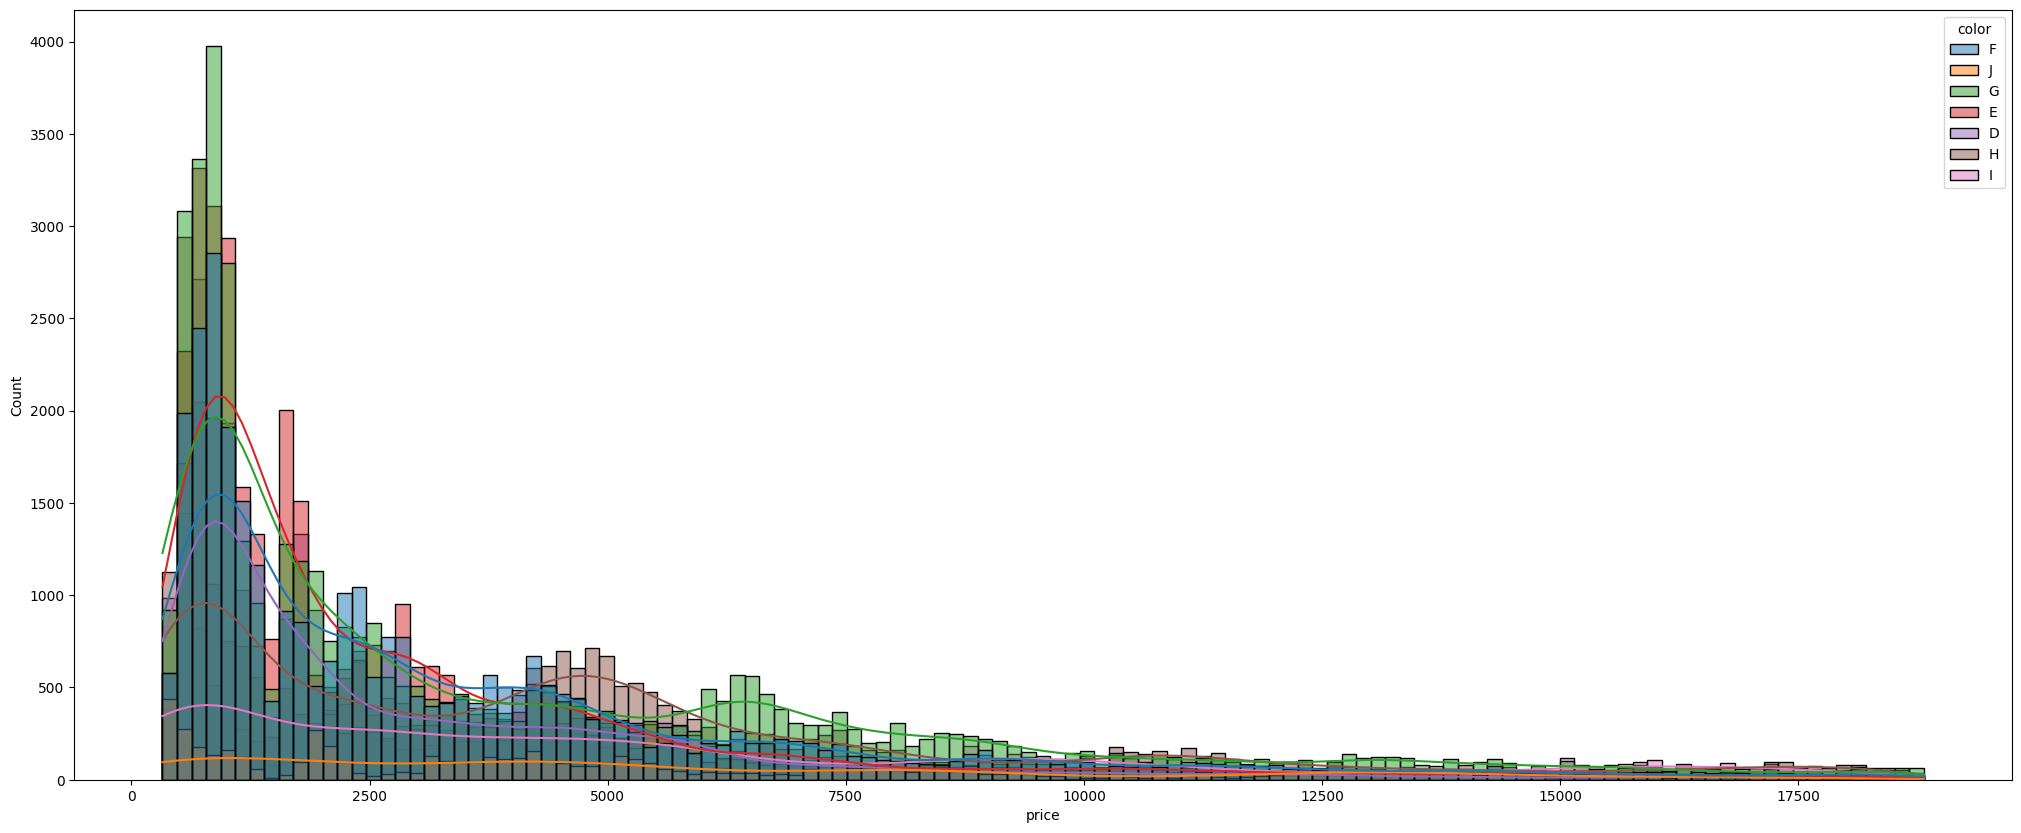

In [19]:
plt.subplots(1,2,figsize=(25,10))
plt.subplot(111)
sns.histplot(data=df2,x='price',kde=True,hue='color')


C:\Users\guddu\AppData\Local\Temp\ipykernel_72680\3339993122.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)


<Axes: xlabel='price', ylabel='Count'>

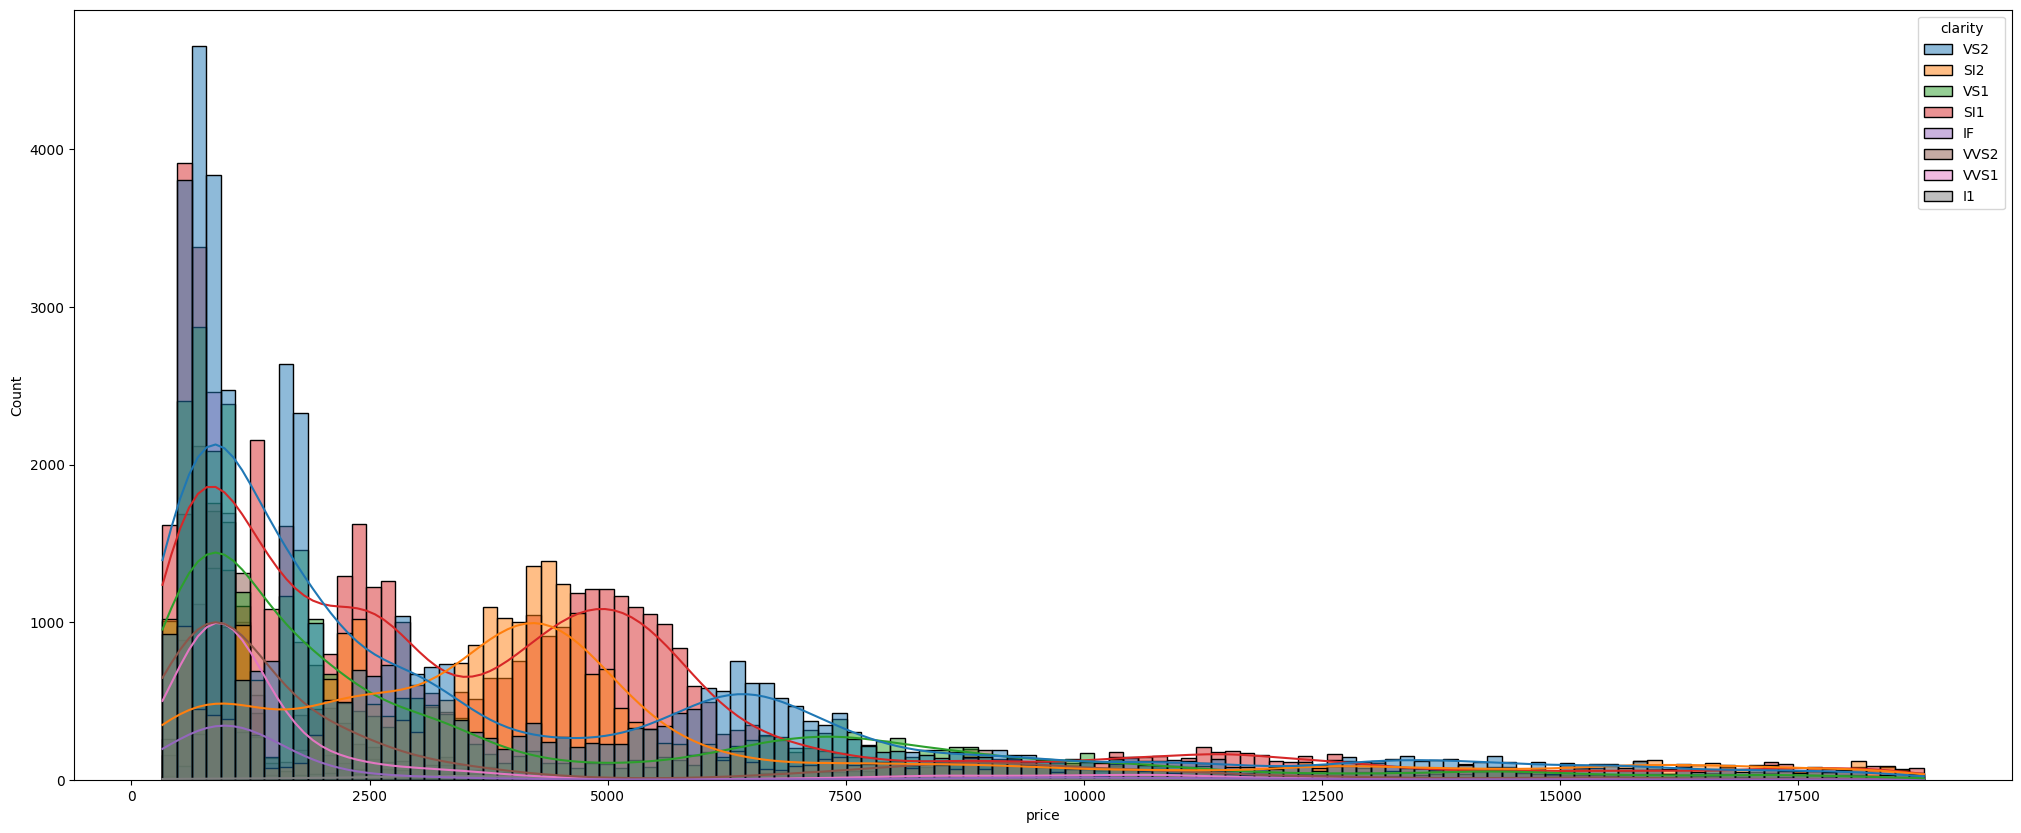

In [20]:
plt.subplots(1,2,figsize=(25,10))
plt.subplot(111)
sns.histplot(data=df2,x='price',kde=True,hue='clarity')

##### Insights
- Gemstone with ideal cut has the maximum number of counts
- In average gemstone with F color is mostly present below the price 5000
- VS2 clarity gemstone dominates below 2500 while SI1 and SI2 clarity dominates the price range of 5000

In [21]:
df2[num_feature]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [22]:
df2[num_feature].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


##### From above we can conclude that the features carat, x, y, and z are highly correlated to each other with more than 97%

### Multivariate analysis using pieplot

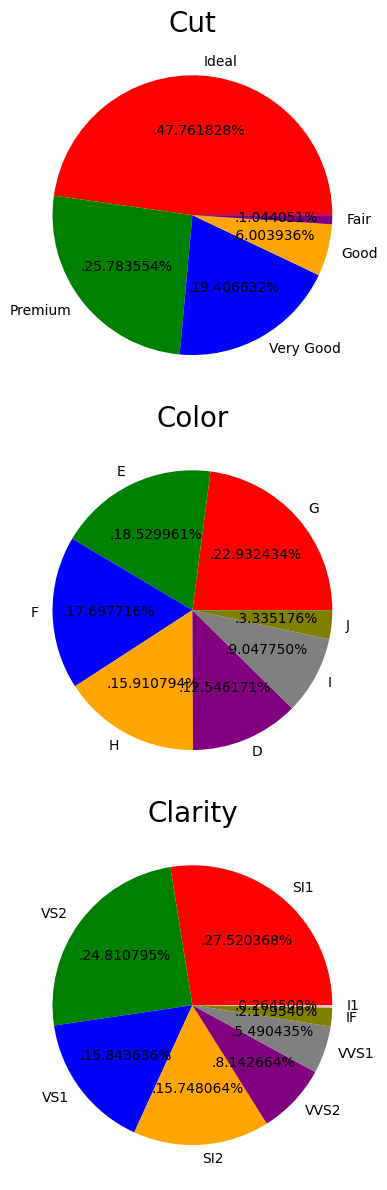

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(3, 1, 1)
size = df2['cut'].value_counts()
labels = 'Ideal','Premium','Very Good','Good','Fair'
color = ['red','green','blue','orange','purple']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Cut', fontsize = 20)
plt.axis('off')

plt.subplot(3, 1, 2)
size = df2['color'].value_counts()
labels = 'G','E','F','H','D','I','J'
color = ['red','green','blue','orange','purple','gray','olive']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Color', fontsize = 20)
plt.axis('off')

plt.subplot(3, 1, 3)
size = df2['clarity'].value_counts()
labels = 'SI1','VS2','VS1','SI2','VVS2','VVS1','IF','I1'
color = ['red','green','blue','orange','purple','gray','olive','pink']

plt.pie(size, colors = color, labels=labels,autopct = '.%2f%%')
plt.title('Clarity', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

##### Insight
- Number of Gemstones with ideal cut is greatest, almost equal to sum of all the other cut
- Gemstones with color G is greater whilst E and F color gemstones are nearly equal
- Gemstones with VS2 clarity are greater followed by SI2 clarity gemstones

### Feature Wise Visualization

#### Cut COLUMN
- How is distribution of Cut ?
- Does cut has any impact on price ?

#### UNIVARIATE ANALYSIS ( How is distribution of Cut ? )

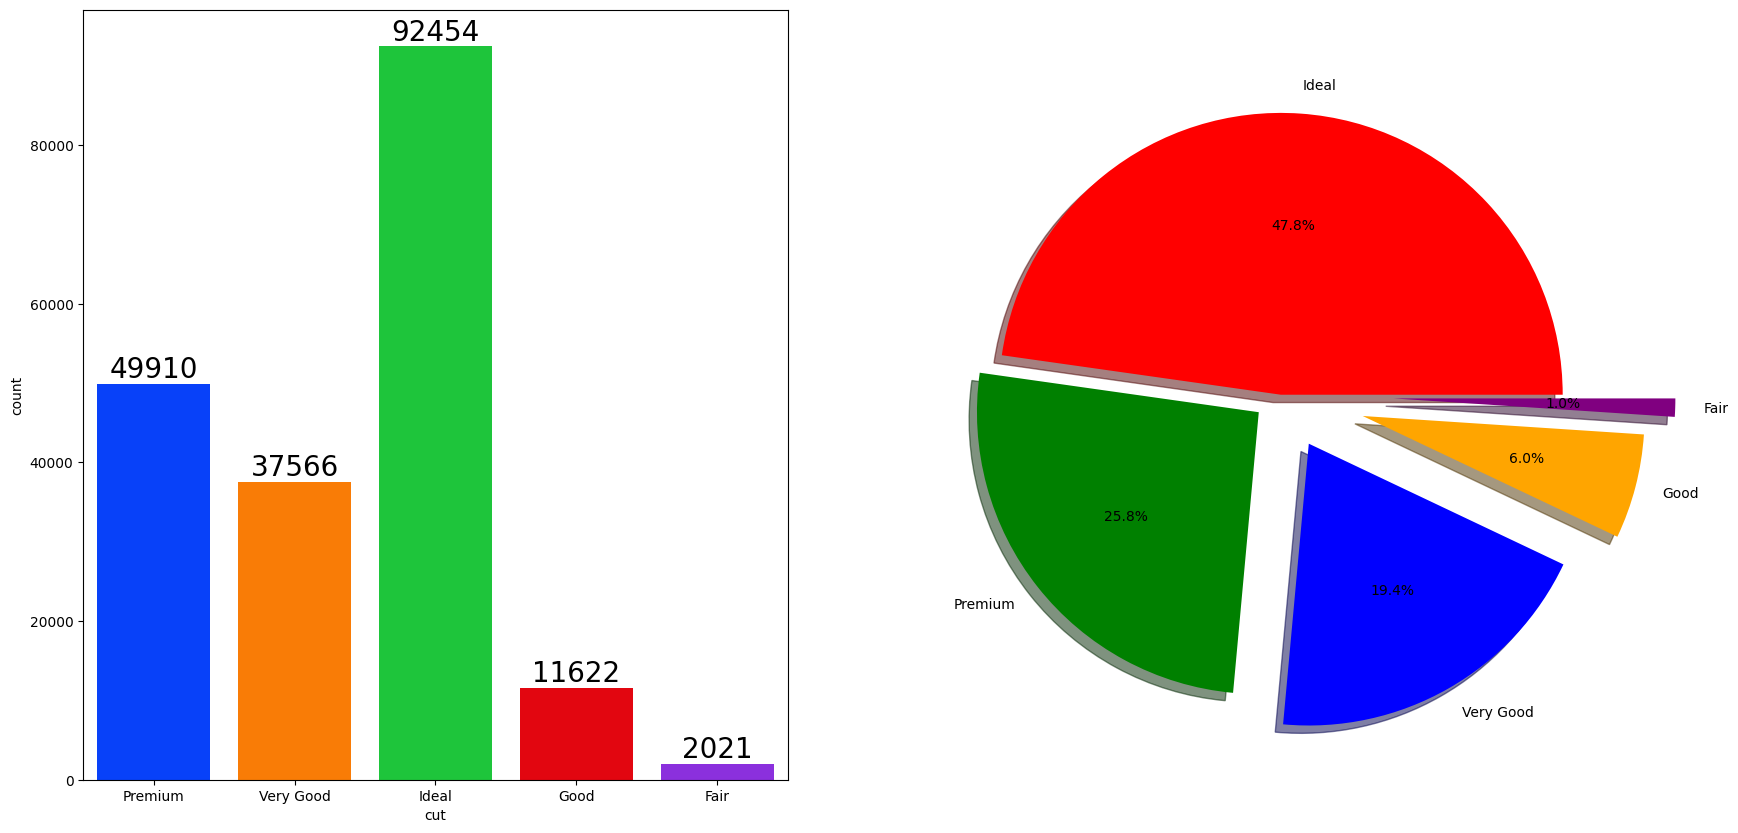

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df2['cut'],data=df2,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df2['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],explode=[0,0.1,0.2,0.3,0.4],autopct='%1.1f%%',shadow=True,colors=['red','green','blue','orange','purple'])
plt.show()

##### Gemstones with Ideal cut are the greater compared to premium, very good, good and fair

### BIVARIATE ANALYSIS ( Is cut has any impact on price ? )

In [25]:
df2.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772


In [26]:
cut_group=df.groupby('cut')[num_feature].mean()
cut_group

,carat,depth,table,x,y,z,price
cut,,,,,,,
Fair,1.024621,64.272044,58.723751,6.227194,6.180134,3.982068,4810.503216
Good,0.876444,62.813810,58.396610,5.912265,5.922445,3.714830,4191.474101
Ideal,0.697933,61.760363,55.973220,5.491404,5.502262,3.394564,3396.186969
Premium,0.904034,61.431935,58.713683,6.004452,5.986009,3.682804,4797.056482
Very Good,0.829261,62.045935,57.898594,5.793753,5.815559,3.600687,4165.304344


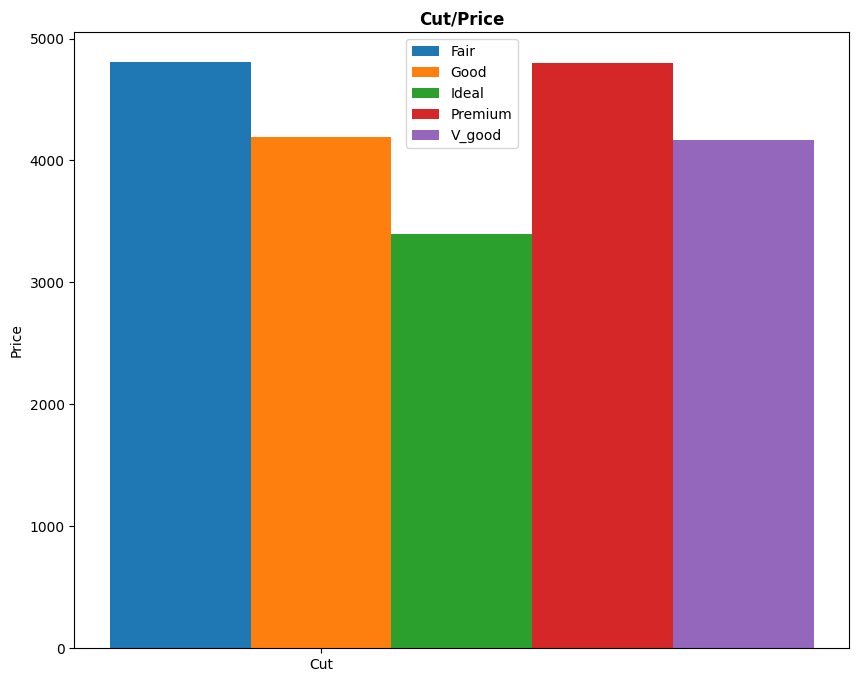

In [27]:
plt.figure(figsize=(10, 8))

X = ['Cut']


fair_price = [cut_group['price'][0]]
good_price = [cut_group['price'][1]]
ideal_price = [cut_group['price'][2]]
premium_price = [cut_group['price'][3]]
very_good_price = [cut_group['price'][4]]


X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fair_price, 0.2, label = 'Fair')
plt.bar(X_axis , good_price, 0.2, label = 'Good')
plt.bar(X_axis +0.2, ideal_price, 0.2, label = 'Ideal')
plt.bar(X_axis +0.4, premium_price, 0.2, label = 'Premium')
plt.bar(X_axis +0.6, very_good_price, 0.2, label = 'V_good')

  
plt.xticks(X_axis, X)
plt.ylabel("Price")
plt.title("Cut/Price", fontweight='bold')
plt.legend()
plt.show()

#### On an average gemstones with fair cut are having more price followed by premium cut


### UNIVARIATE ANALYSIS ( How is distribution of Color ? )

#### Color COLUMN¶
- How is distribution of Color ?
- Does Color has any impact on price ?

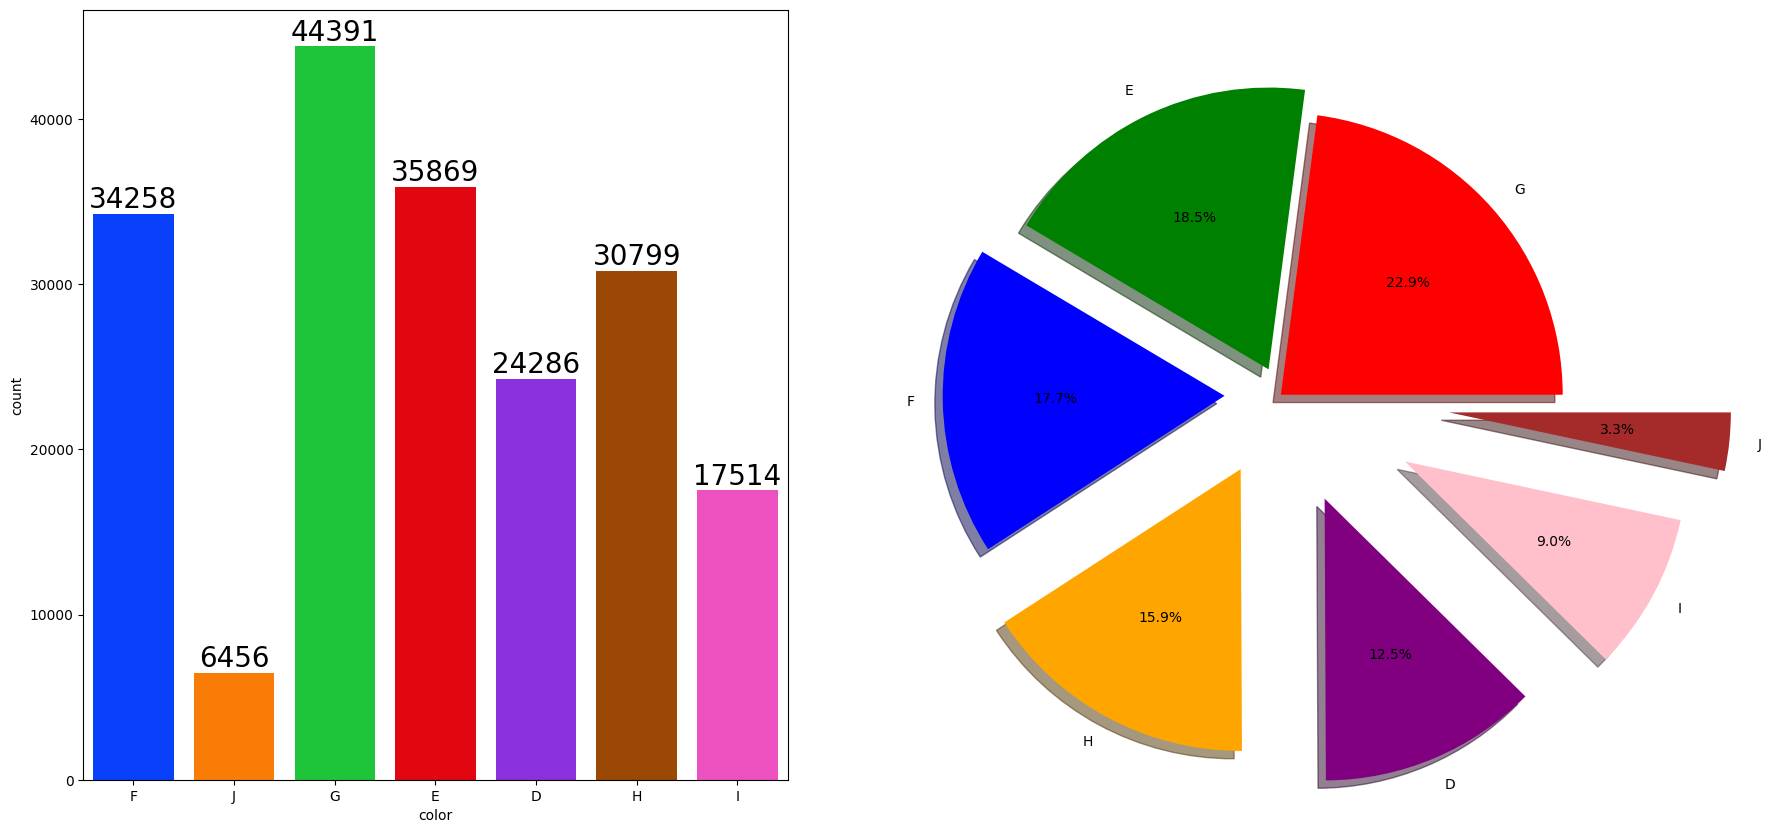

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df2['color'],data=df2,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df2['color'].value_counts(),labels=['G','E','F','H','D','I','J'],explode=[0,0.1,0.2,0.3,0.4,0.5,0.6],autopct='%1.1f%%',shadow=True,colors=['red','green','blue','orange','purple','pink','brown'])
plt.show()

- Gemstones having color G are the highest while J being the lowest
- Gemstones having color F and E are merely equal

### BIVARIATE ANALYSIS ( Is color has any impact on price ? )

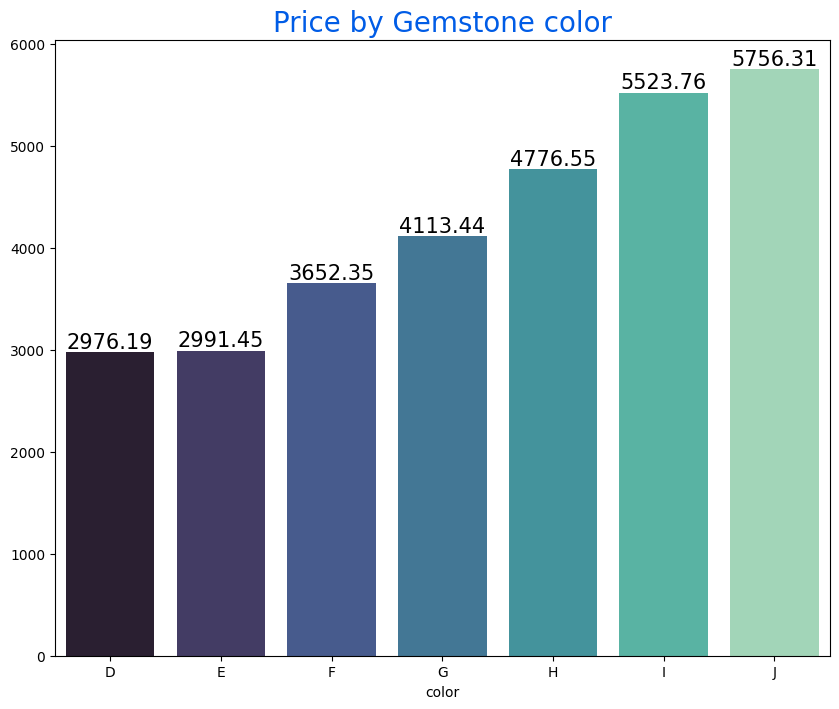

In [29]:
color_group=df.groupby('color')
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.barplot(x=color_group['price'].mean().index,y=color_group['price'].mean().values,palette = 'mako',ax=ax)
ax.set_title('Price by Gemstone color',color='#005ce6',size=20)

for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

- The average price for gemstone haveing color J is highest 
- Color D and E are having the same average price

### UNIVARIATE ANALYSIS ( How is distribution of Clarity ? )

#### Clarity COLUMN¶
- How is distribution of Color ?
- Does Color has any impact on price ?

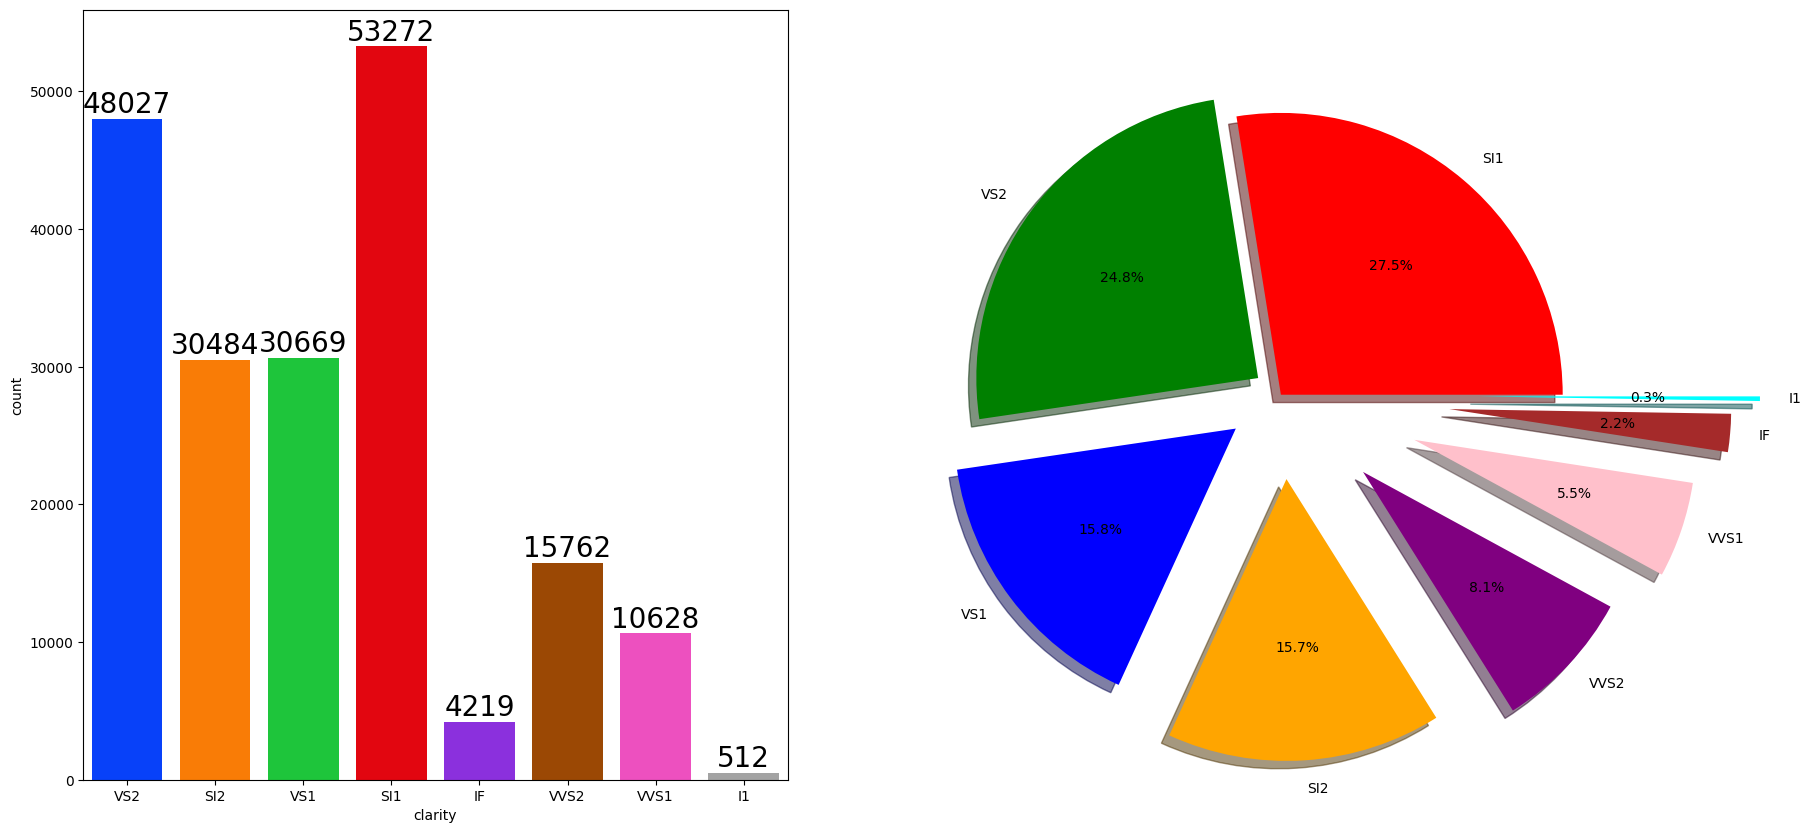

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df2['clarity'],data=df2,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df2['clarity'].value_counts(),labels=['SI1','VS2','VS1','SI2','VVS2','VVS1','IF','I1'],explode=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],autopct='%1.1f%%',shadow=True,colors=['red','green','blue','orange','purple','pink','brown','cyan'])
plt.show()

- Gemstones having clarity of SI1 are greater
- Gemstones with I1 clarity are hardly present

### BIVARIATE ANALYSIS ( Is clarity has any impact on price ? )

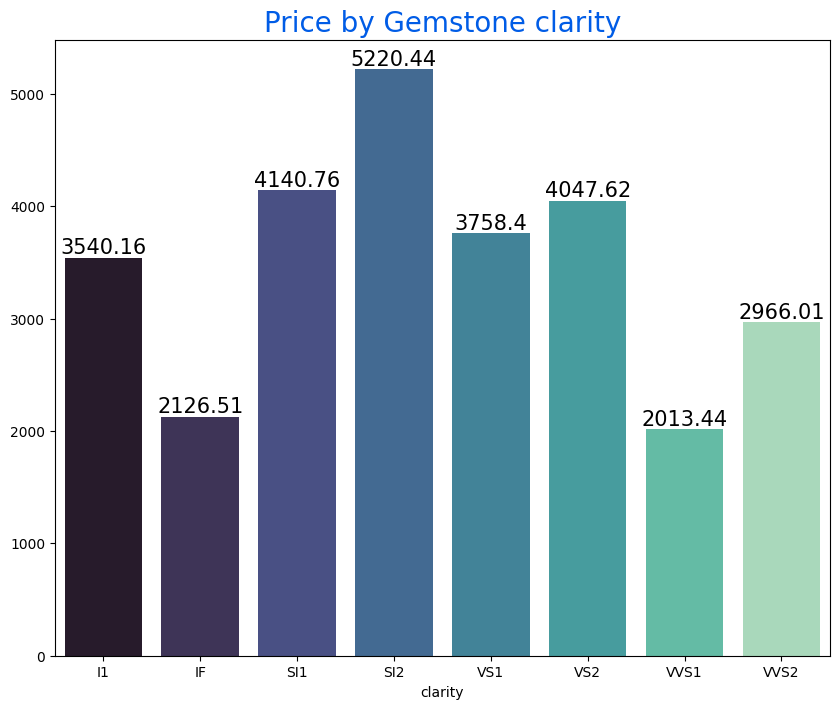

In [31]:
clarity_group=df.groupby('clarity')
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.barplot(x=clarity_group['price'].mean().index,y=clarity_group['price'].mean().values,palette = 'mako',ax=ax)
ax.set_title('Price by Gemstone clarity',color='#005ce6',size=20)

for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

- On an average the price of gemstone with SI2 clarity cost more than rest of the clarity

### Visualizing num_feature features

In [32]:
df2[num_feature]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


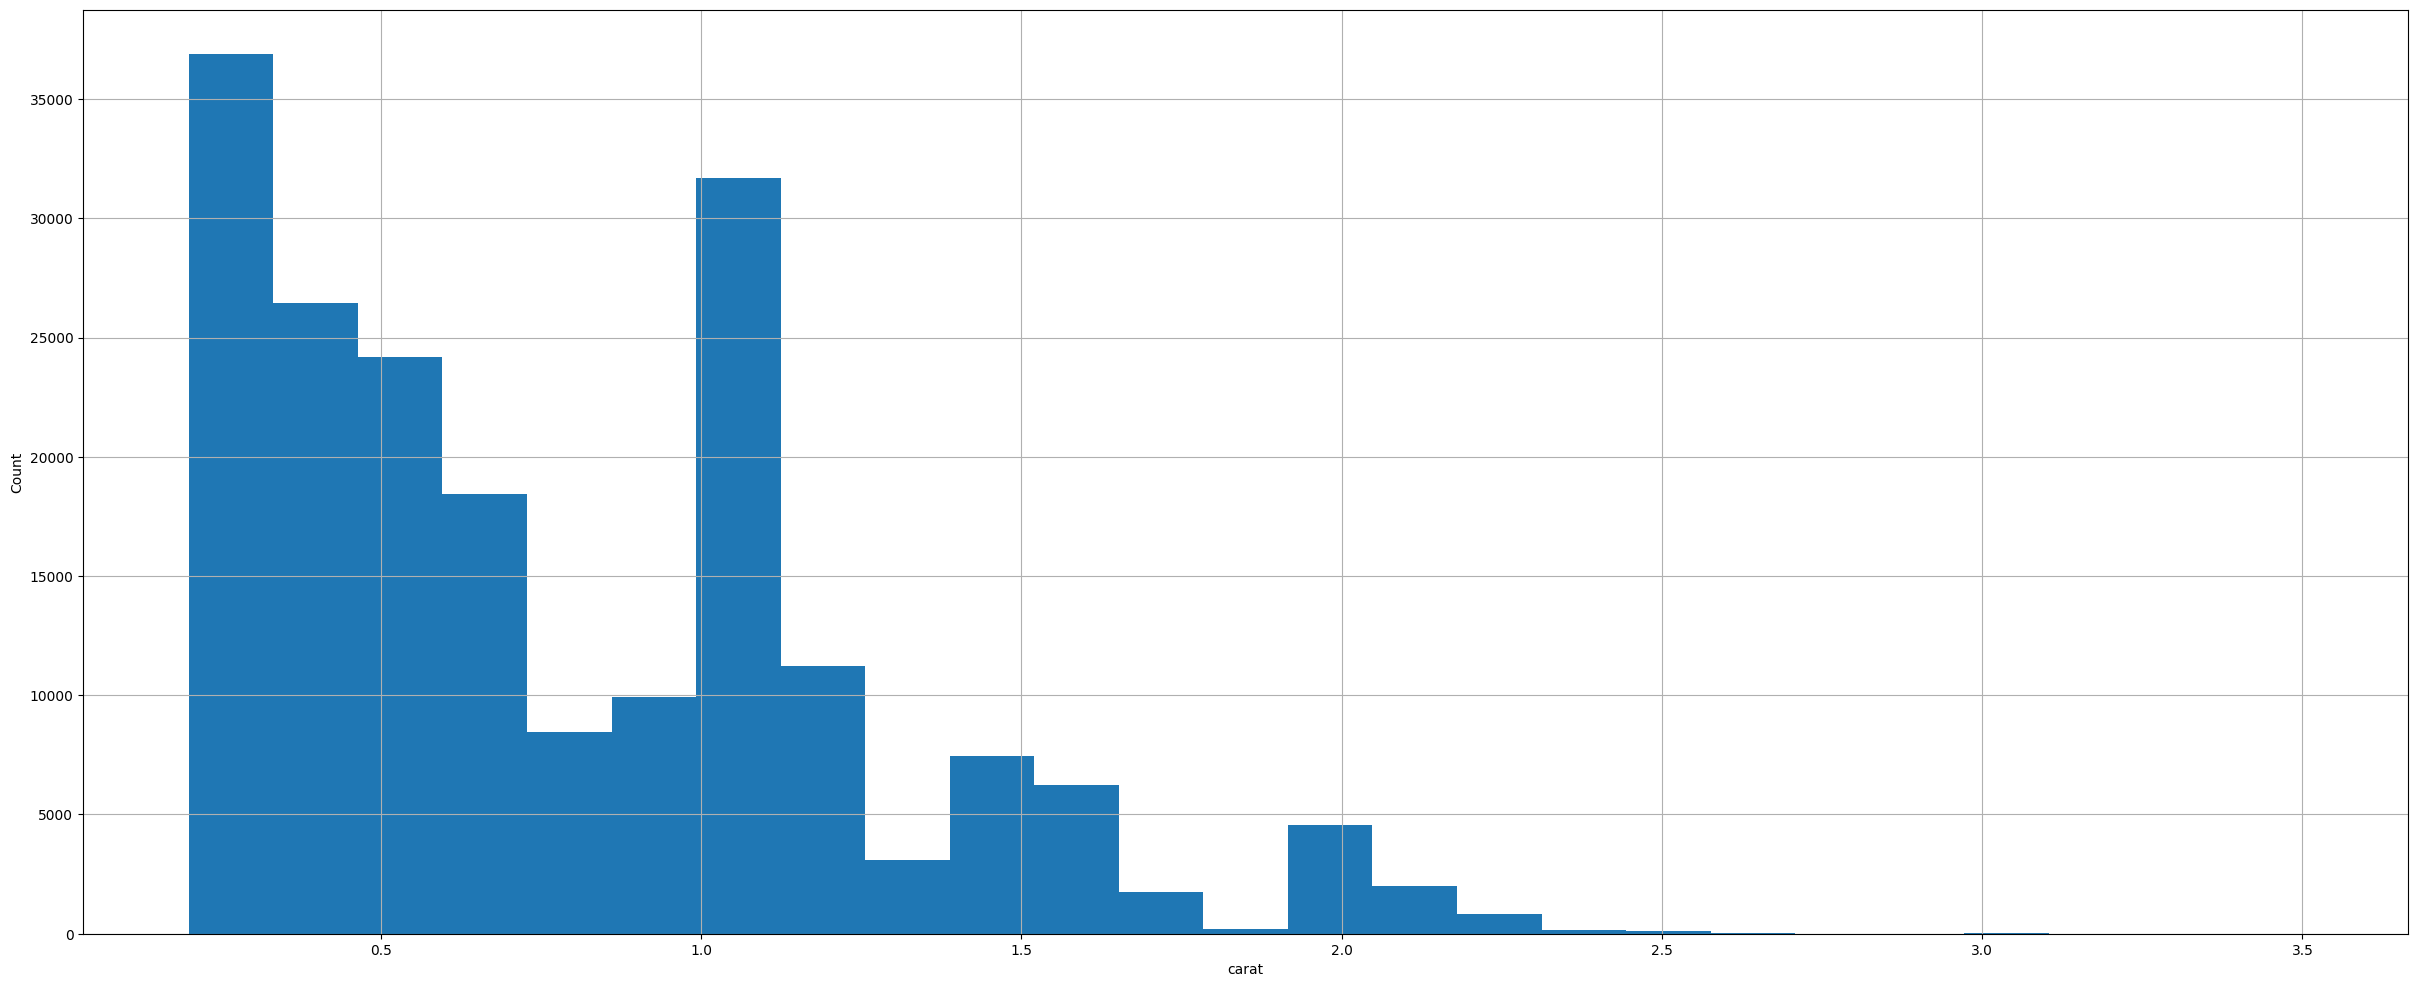

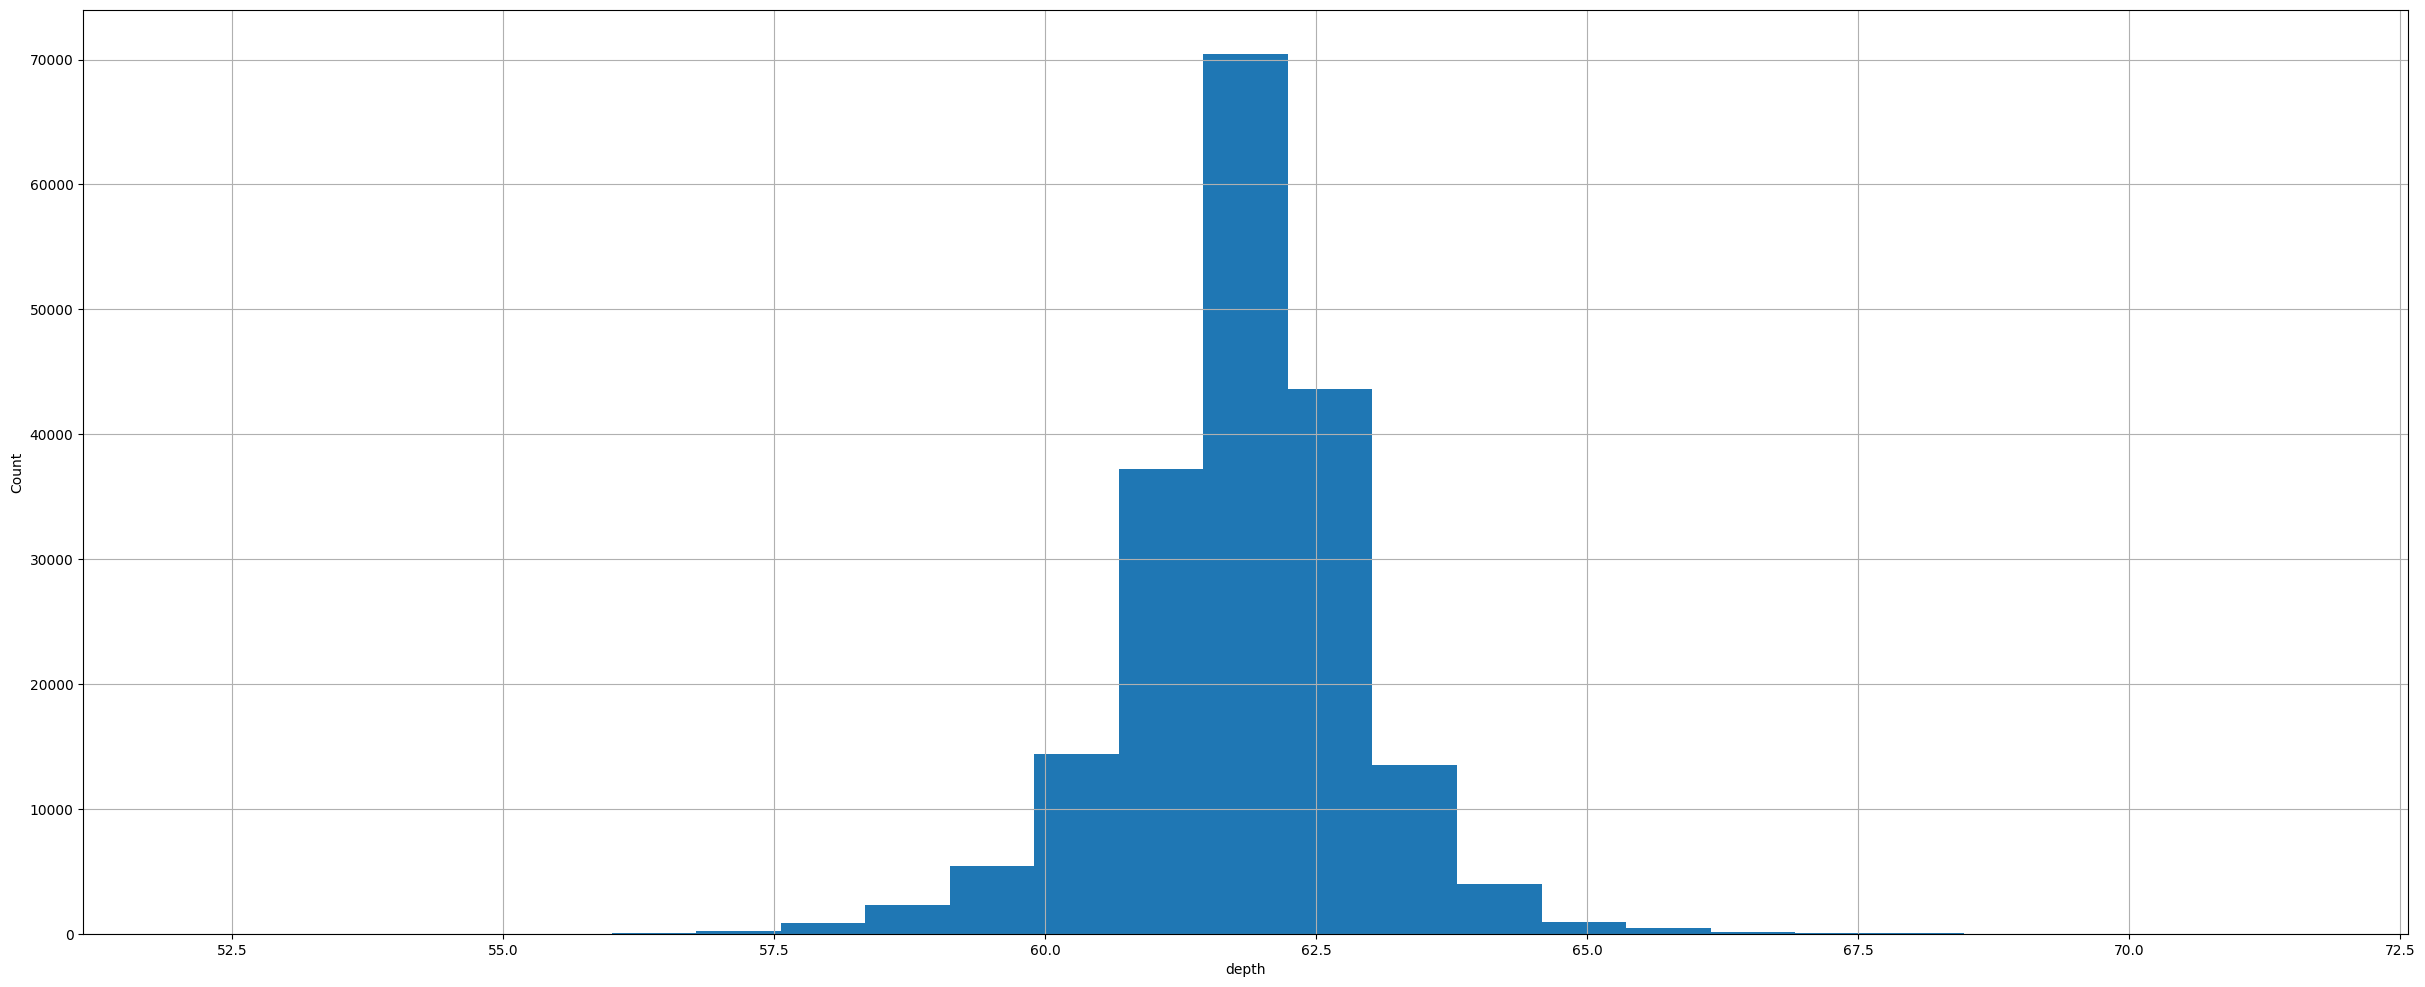

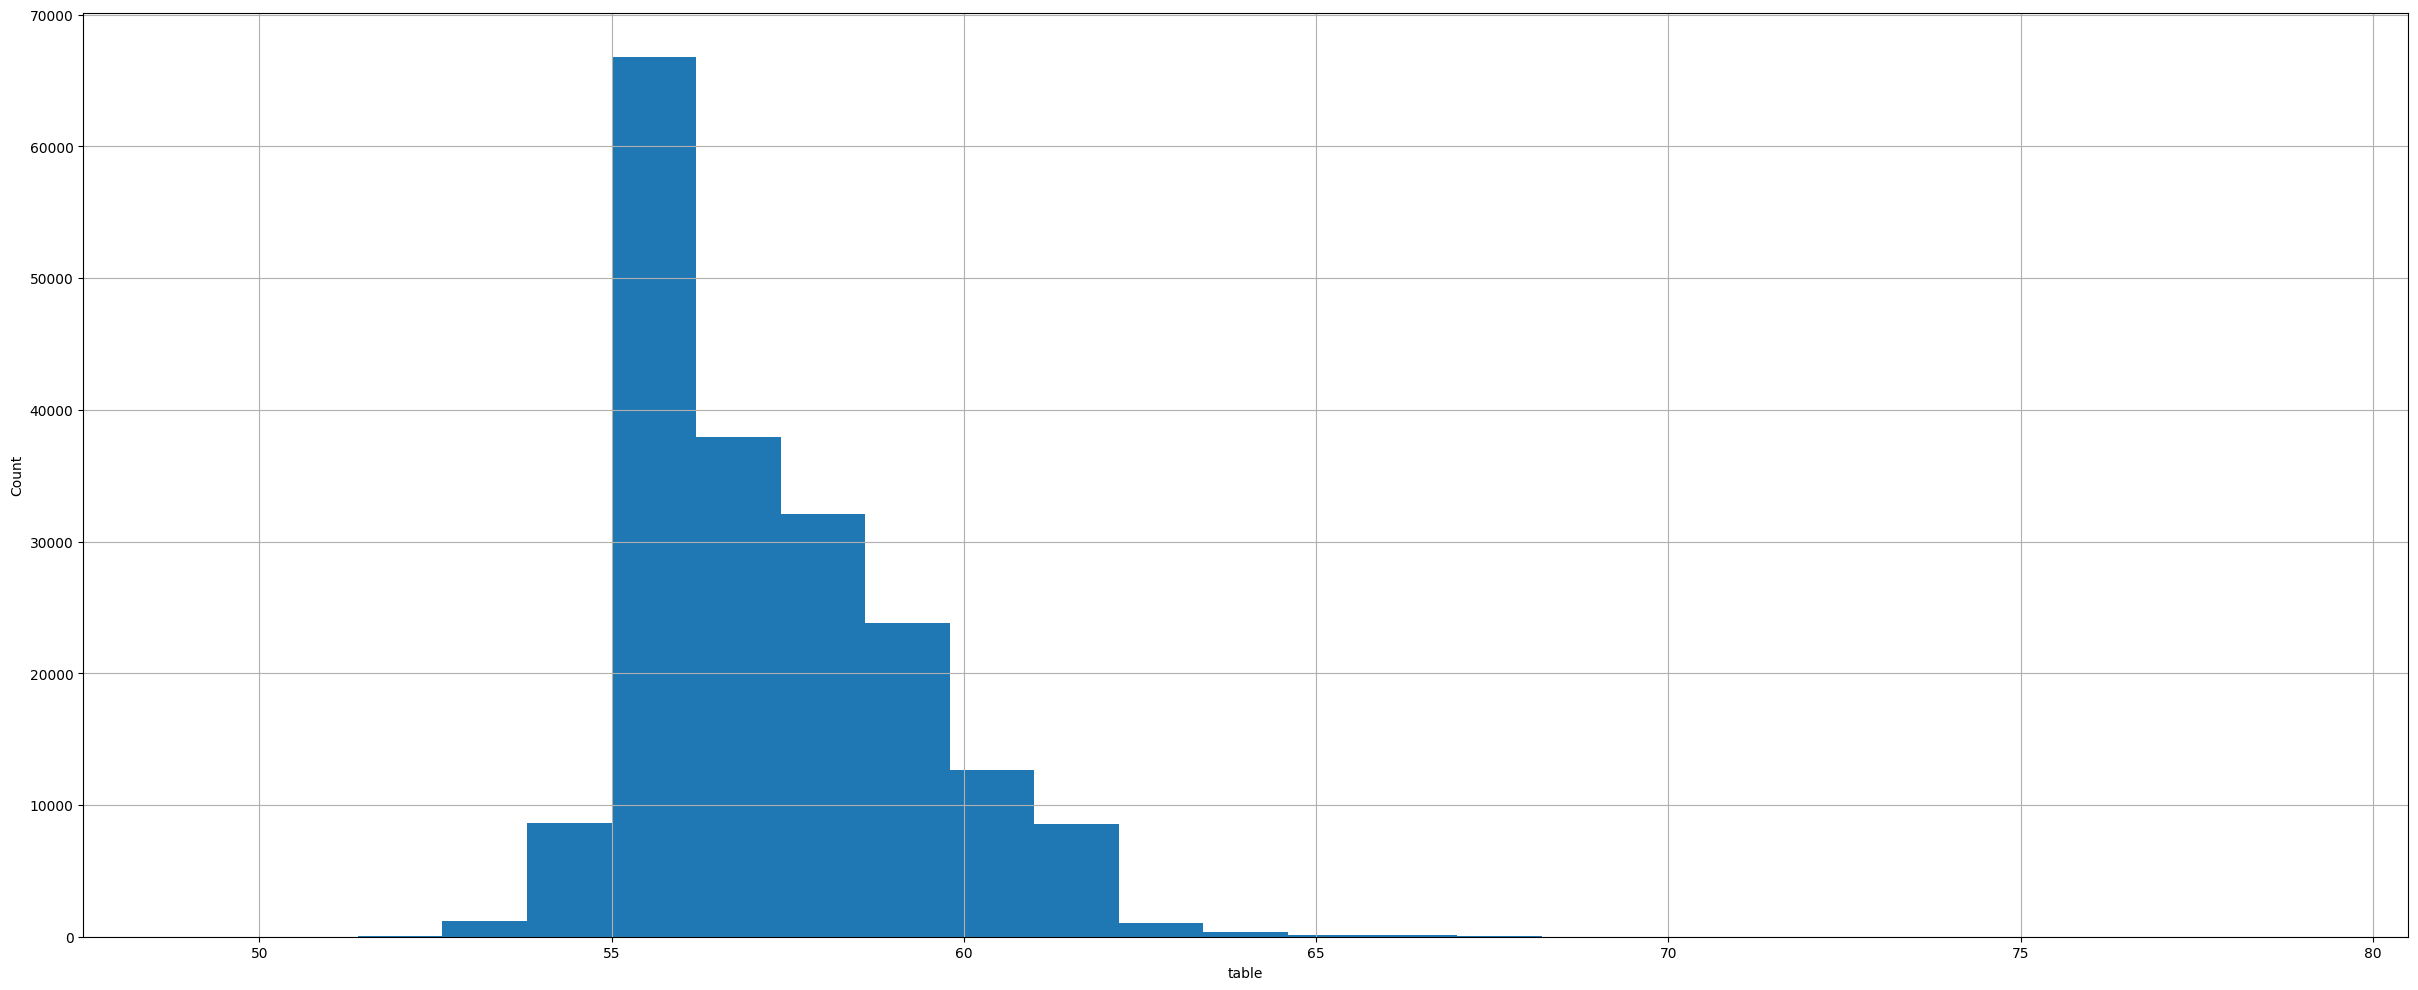

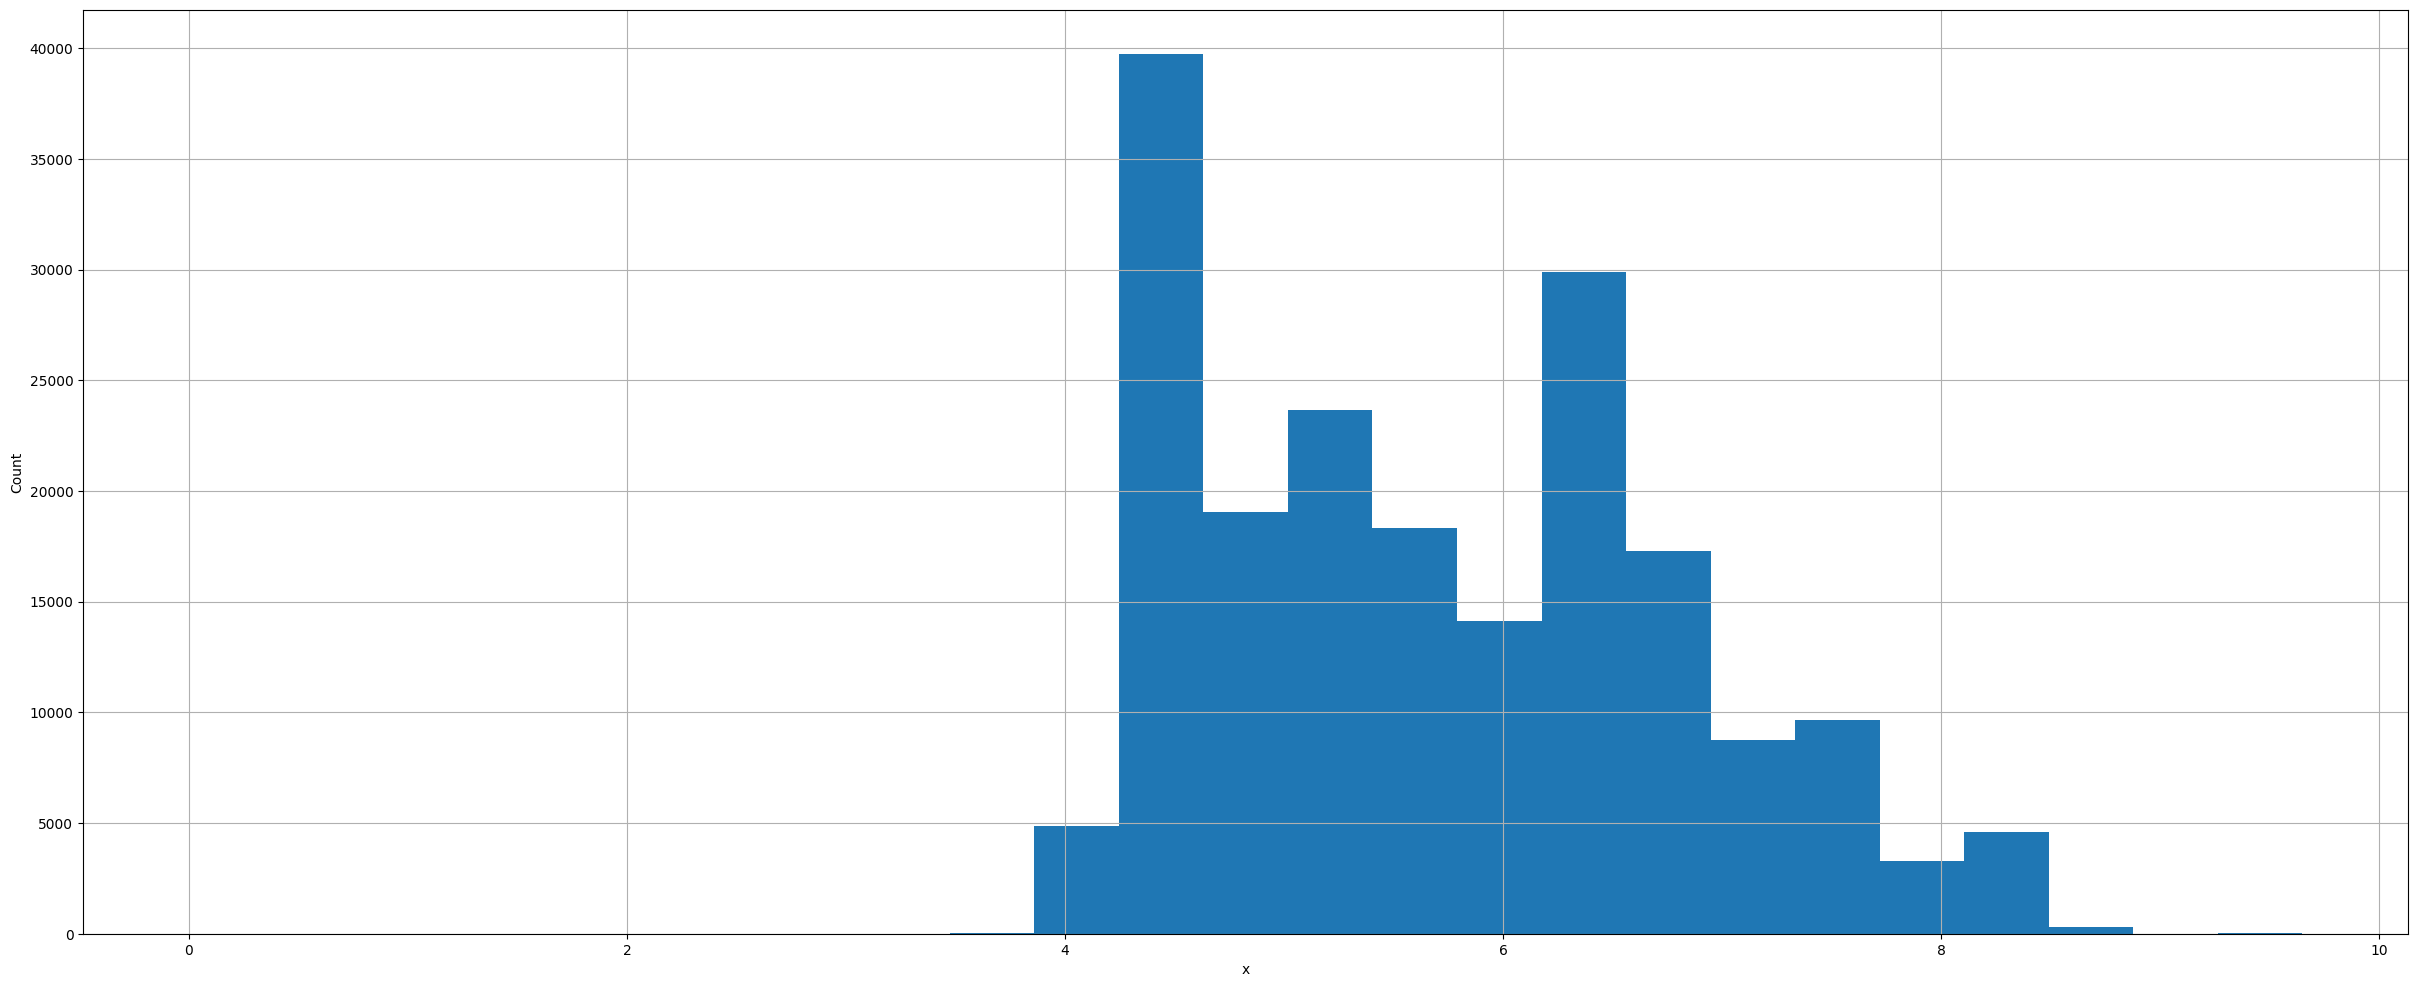

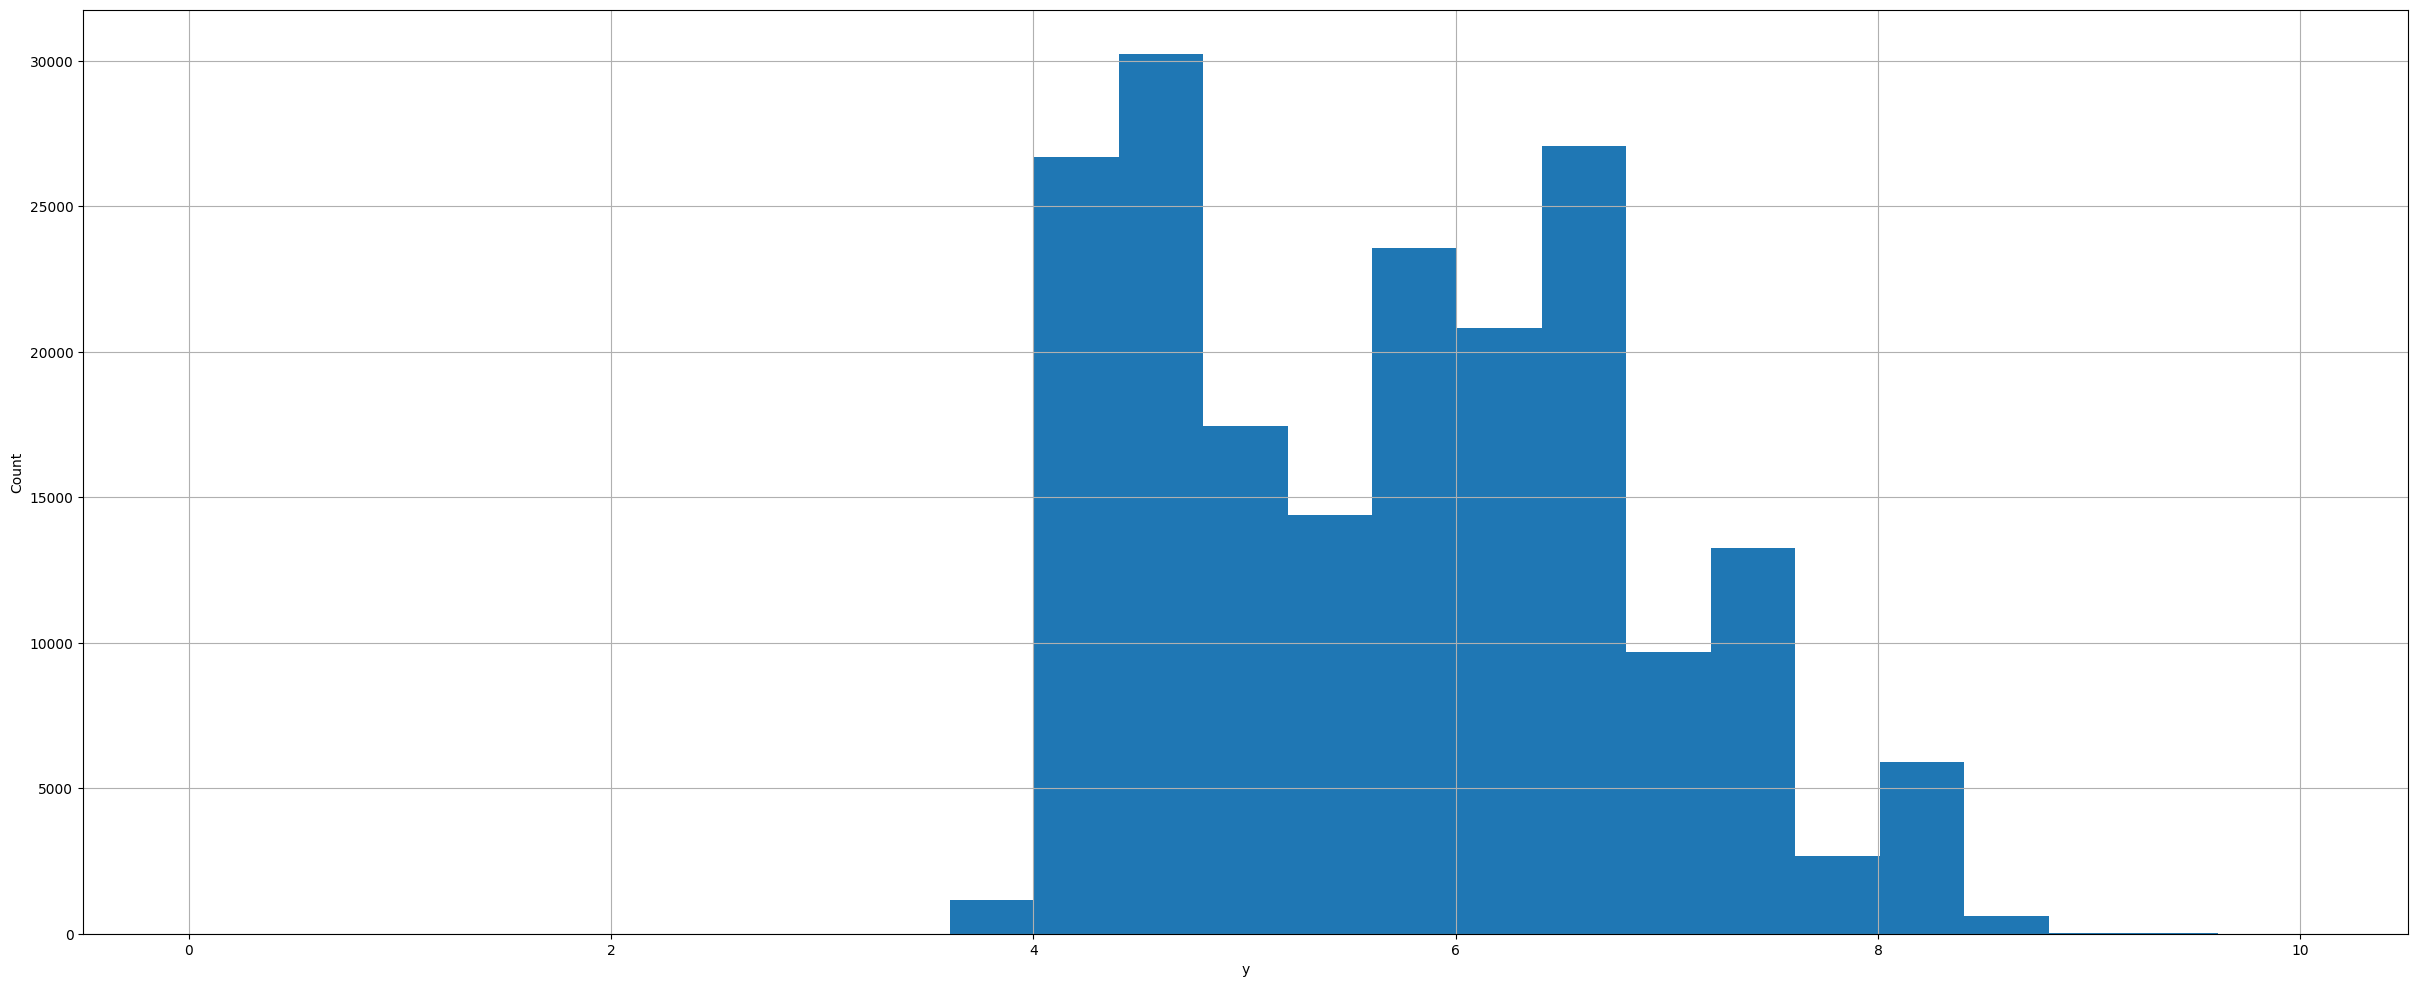

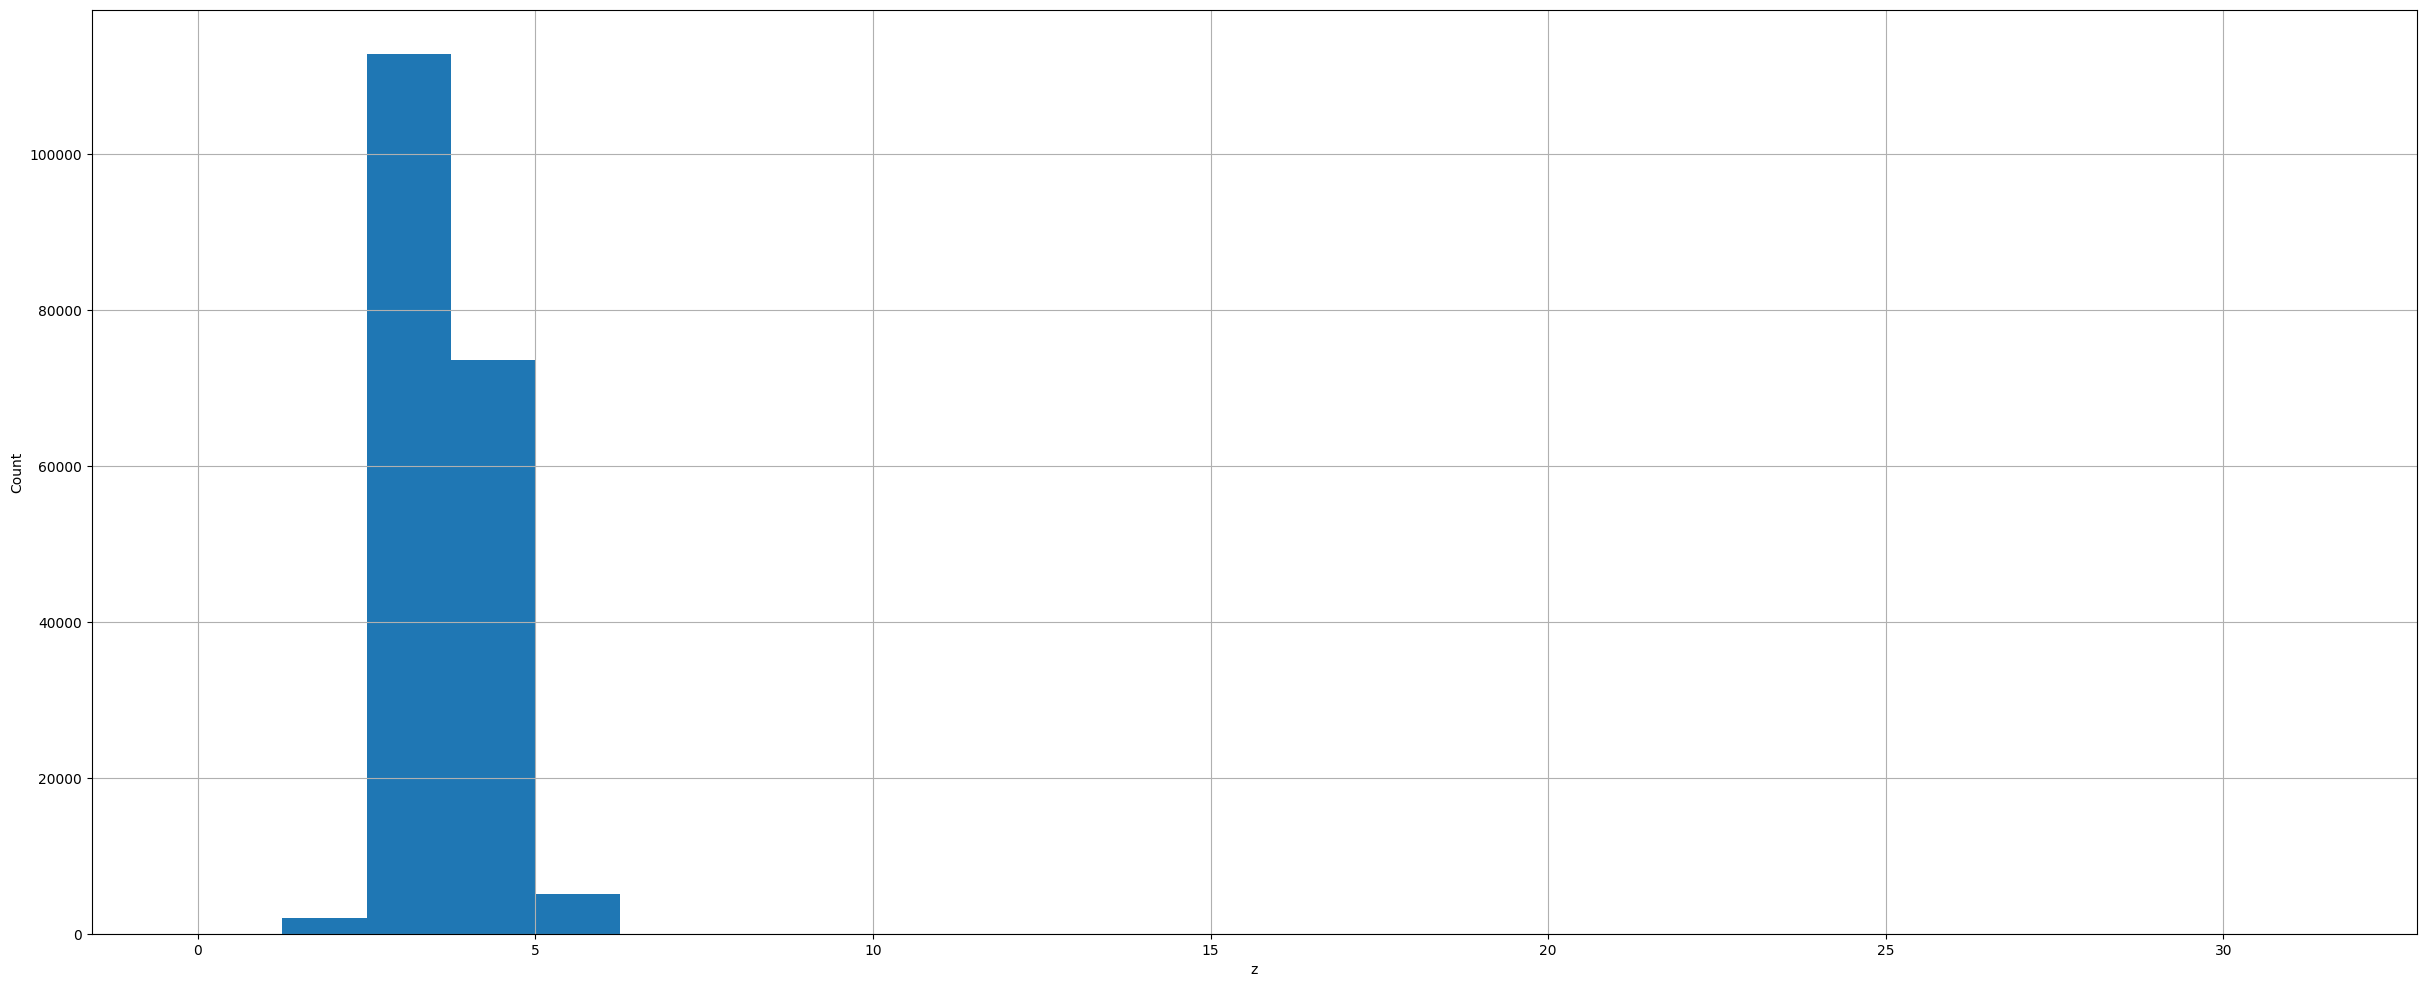

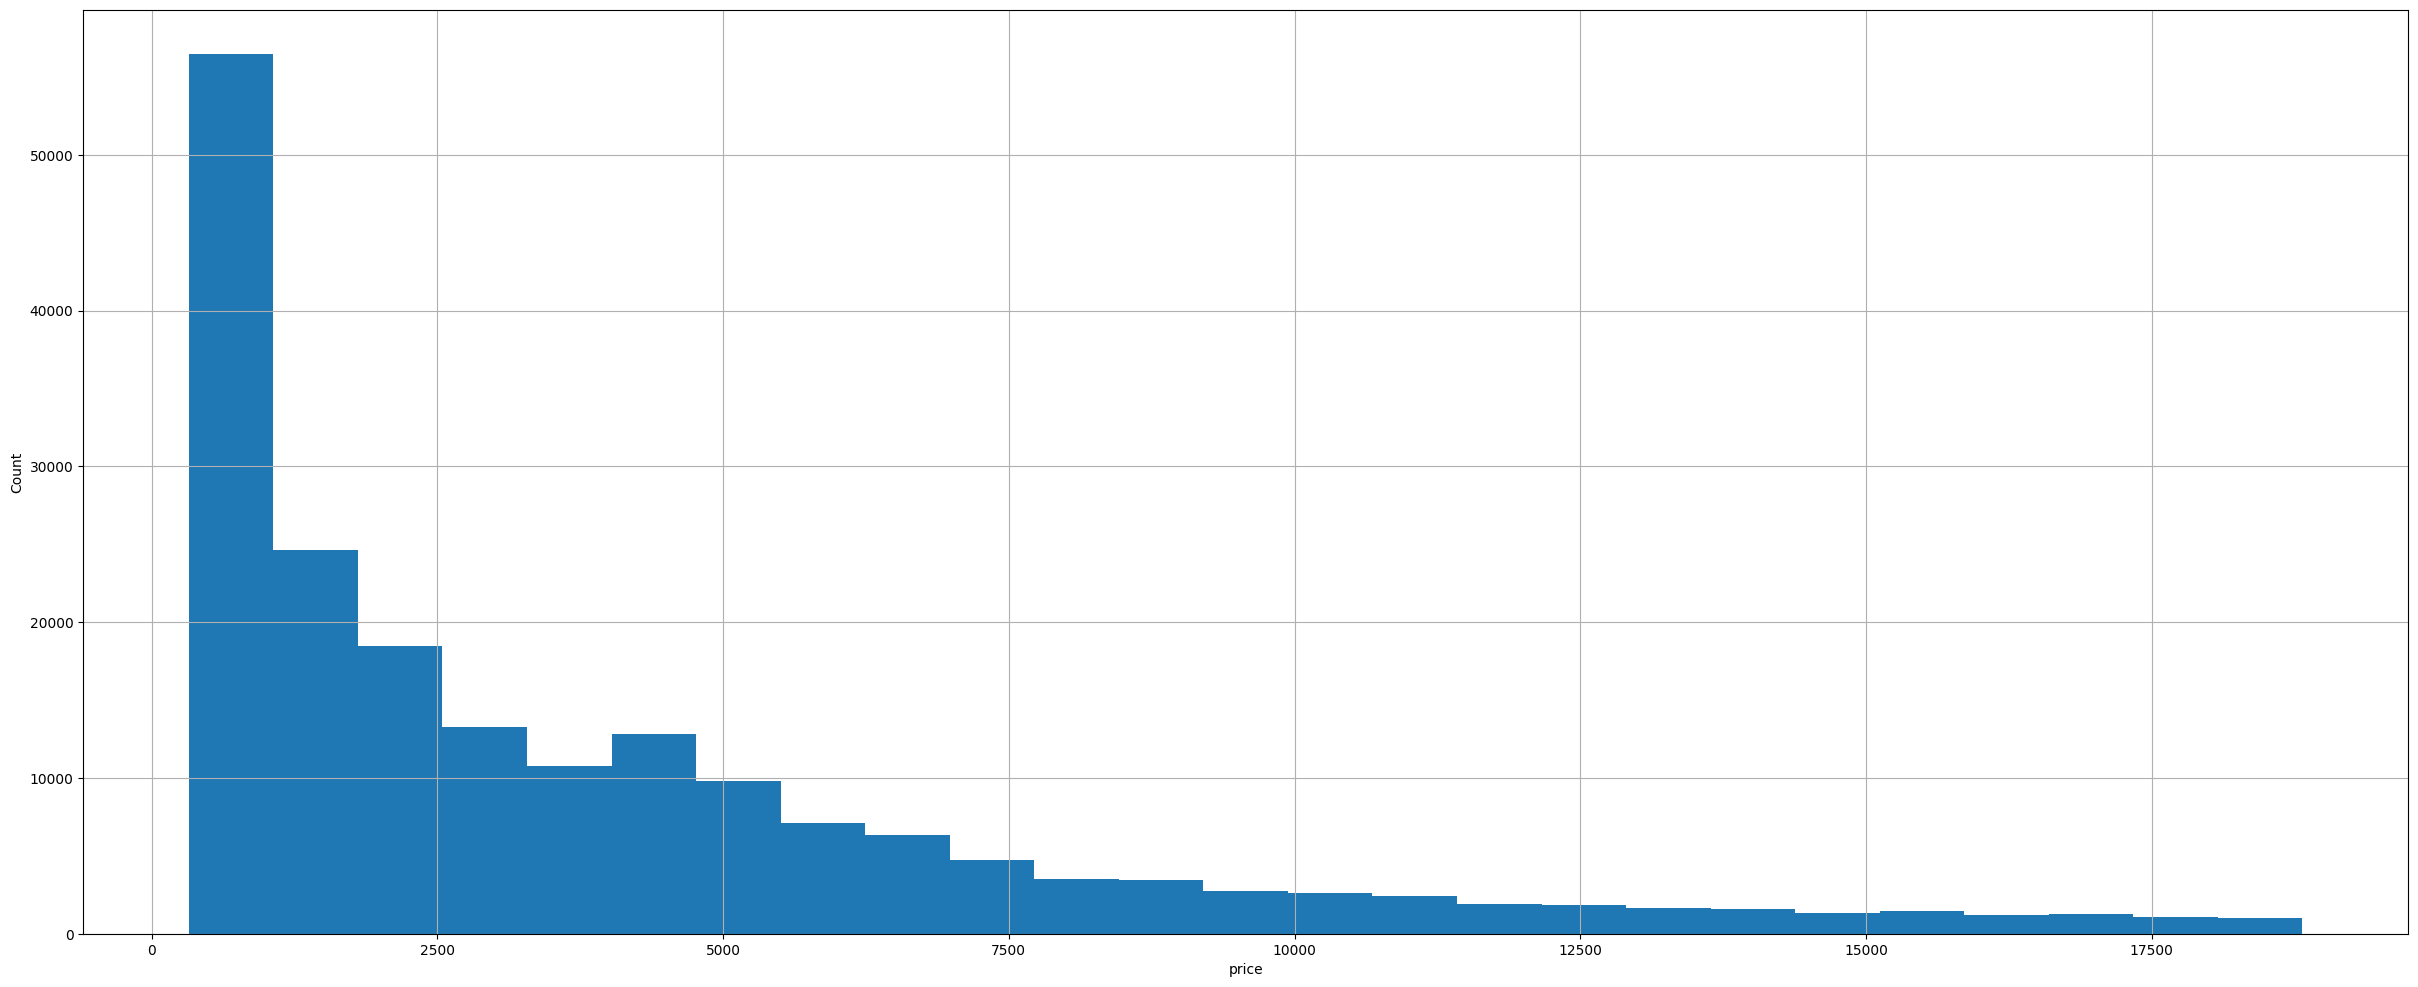

In [33]:
for features in num_feature:
    df3=df2.copy()
    df3[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.show()

##### Using logNormal transformation for converting normally distributing the data

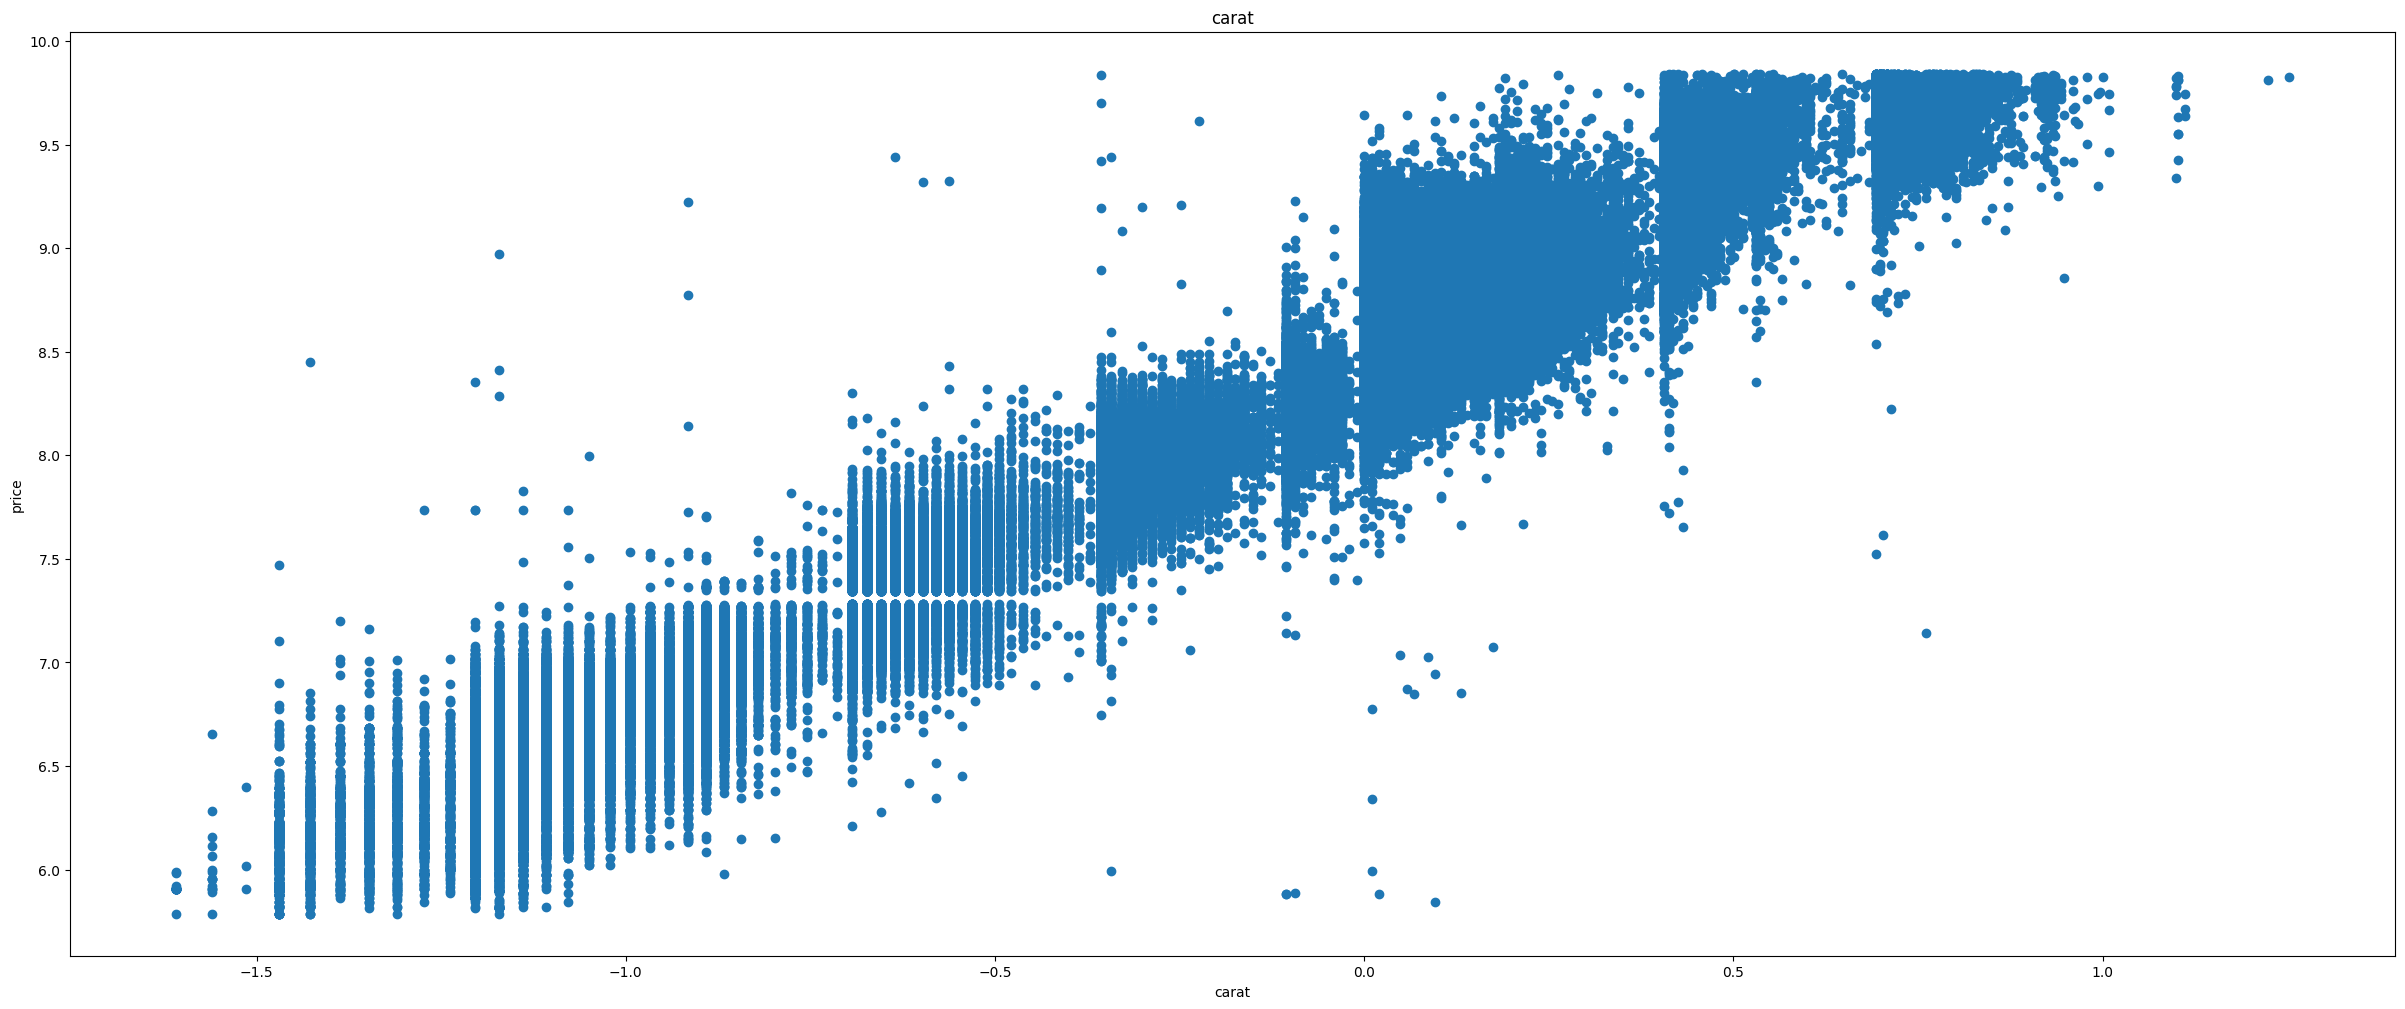

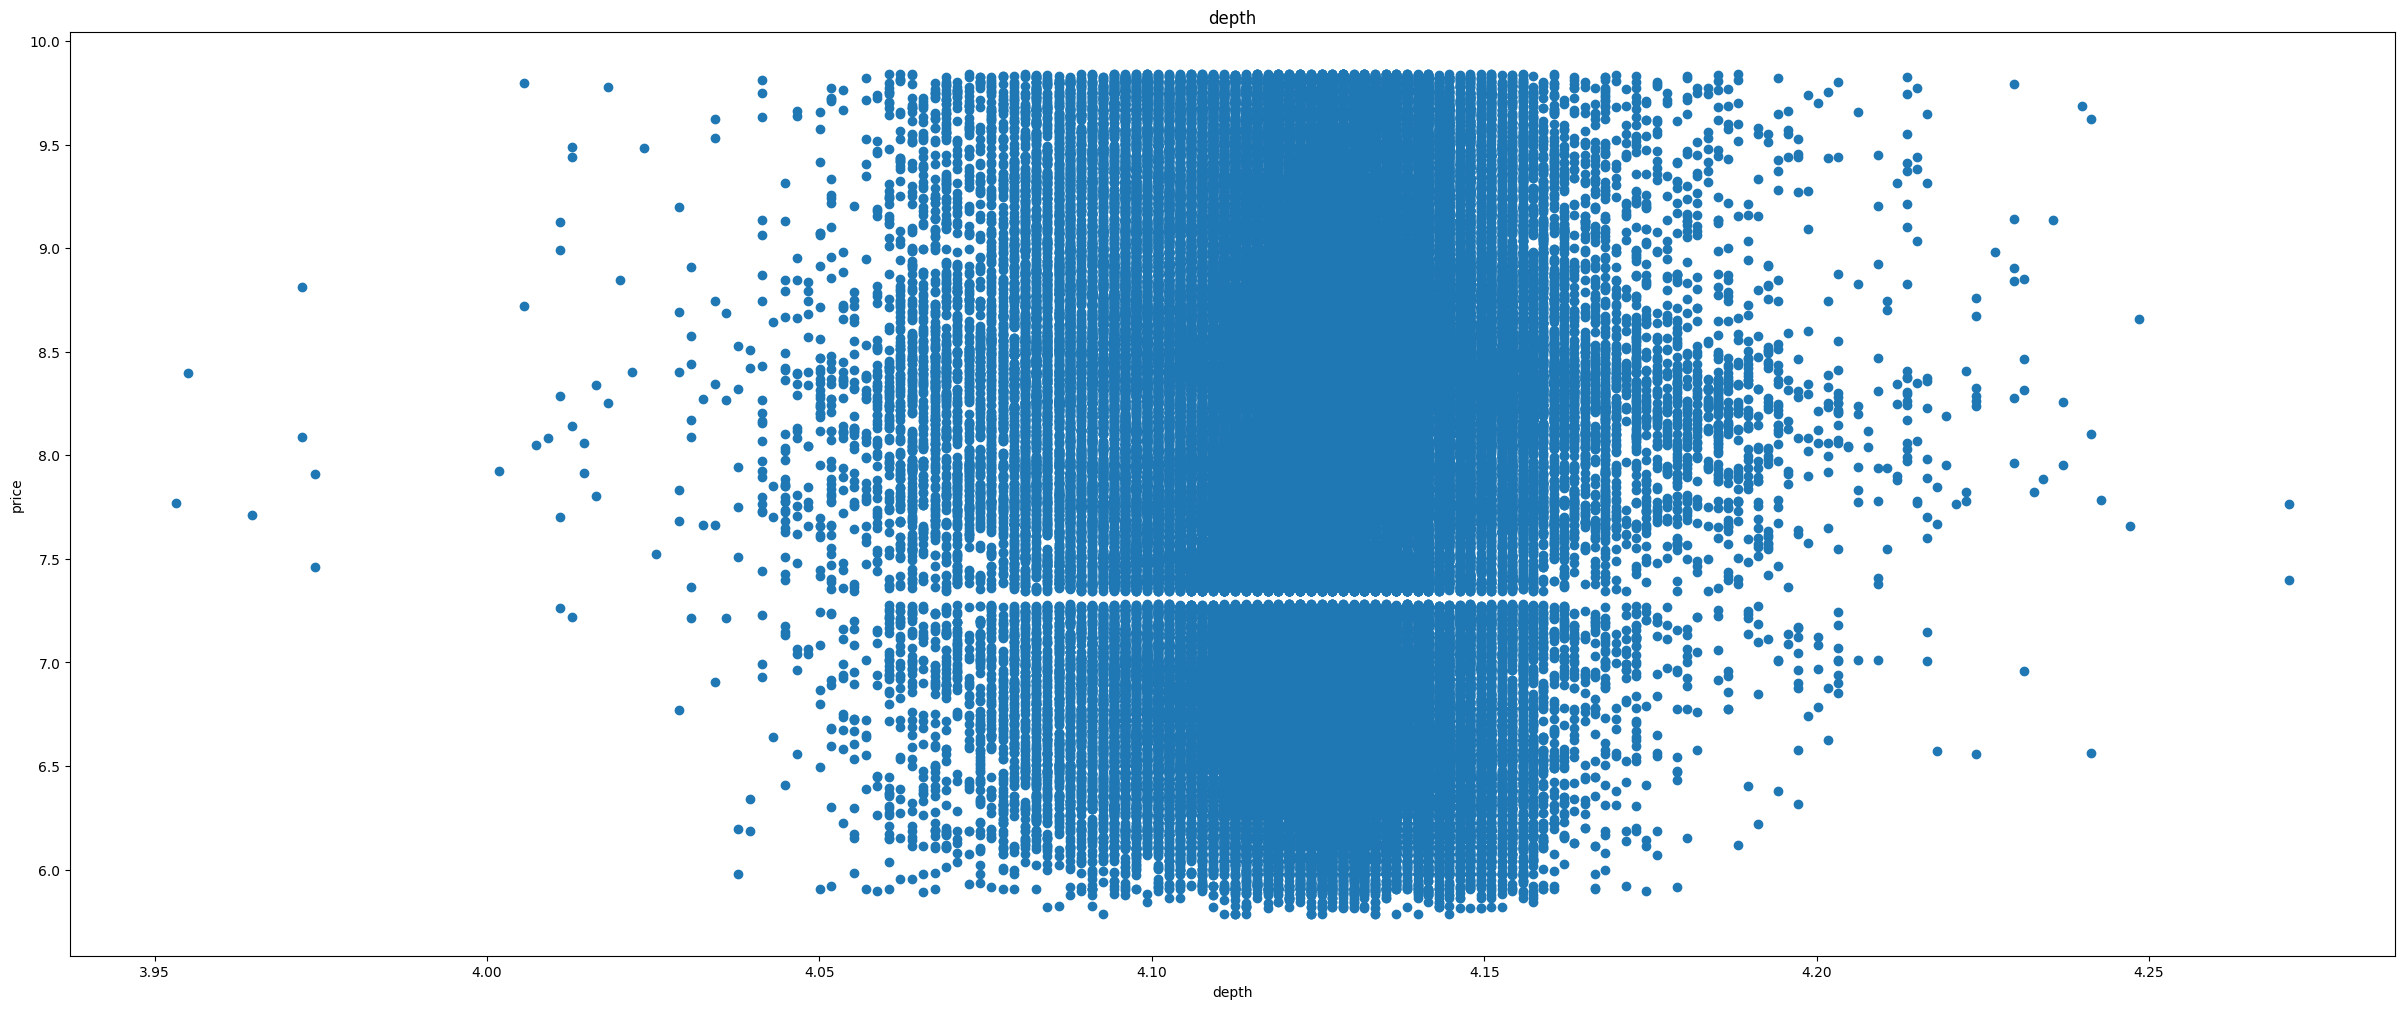

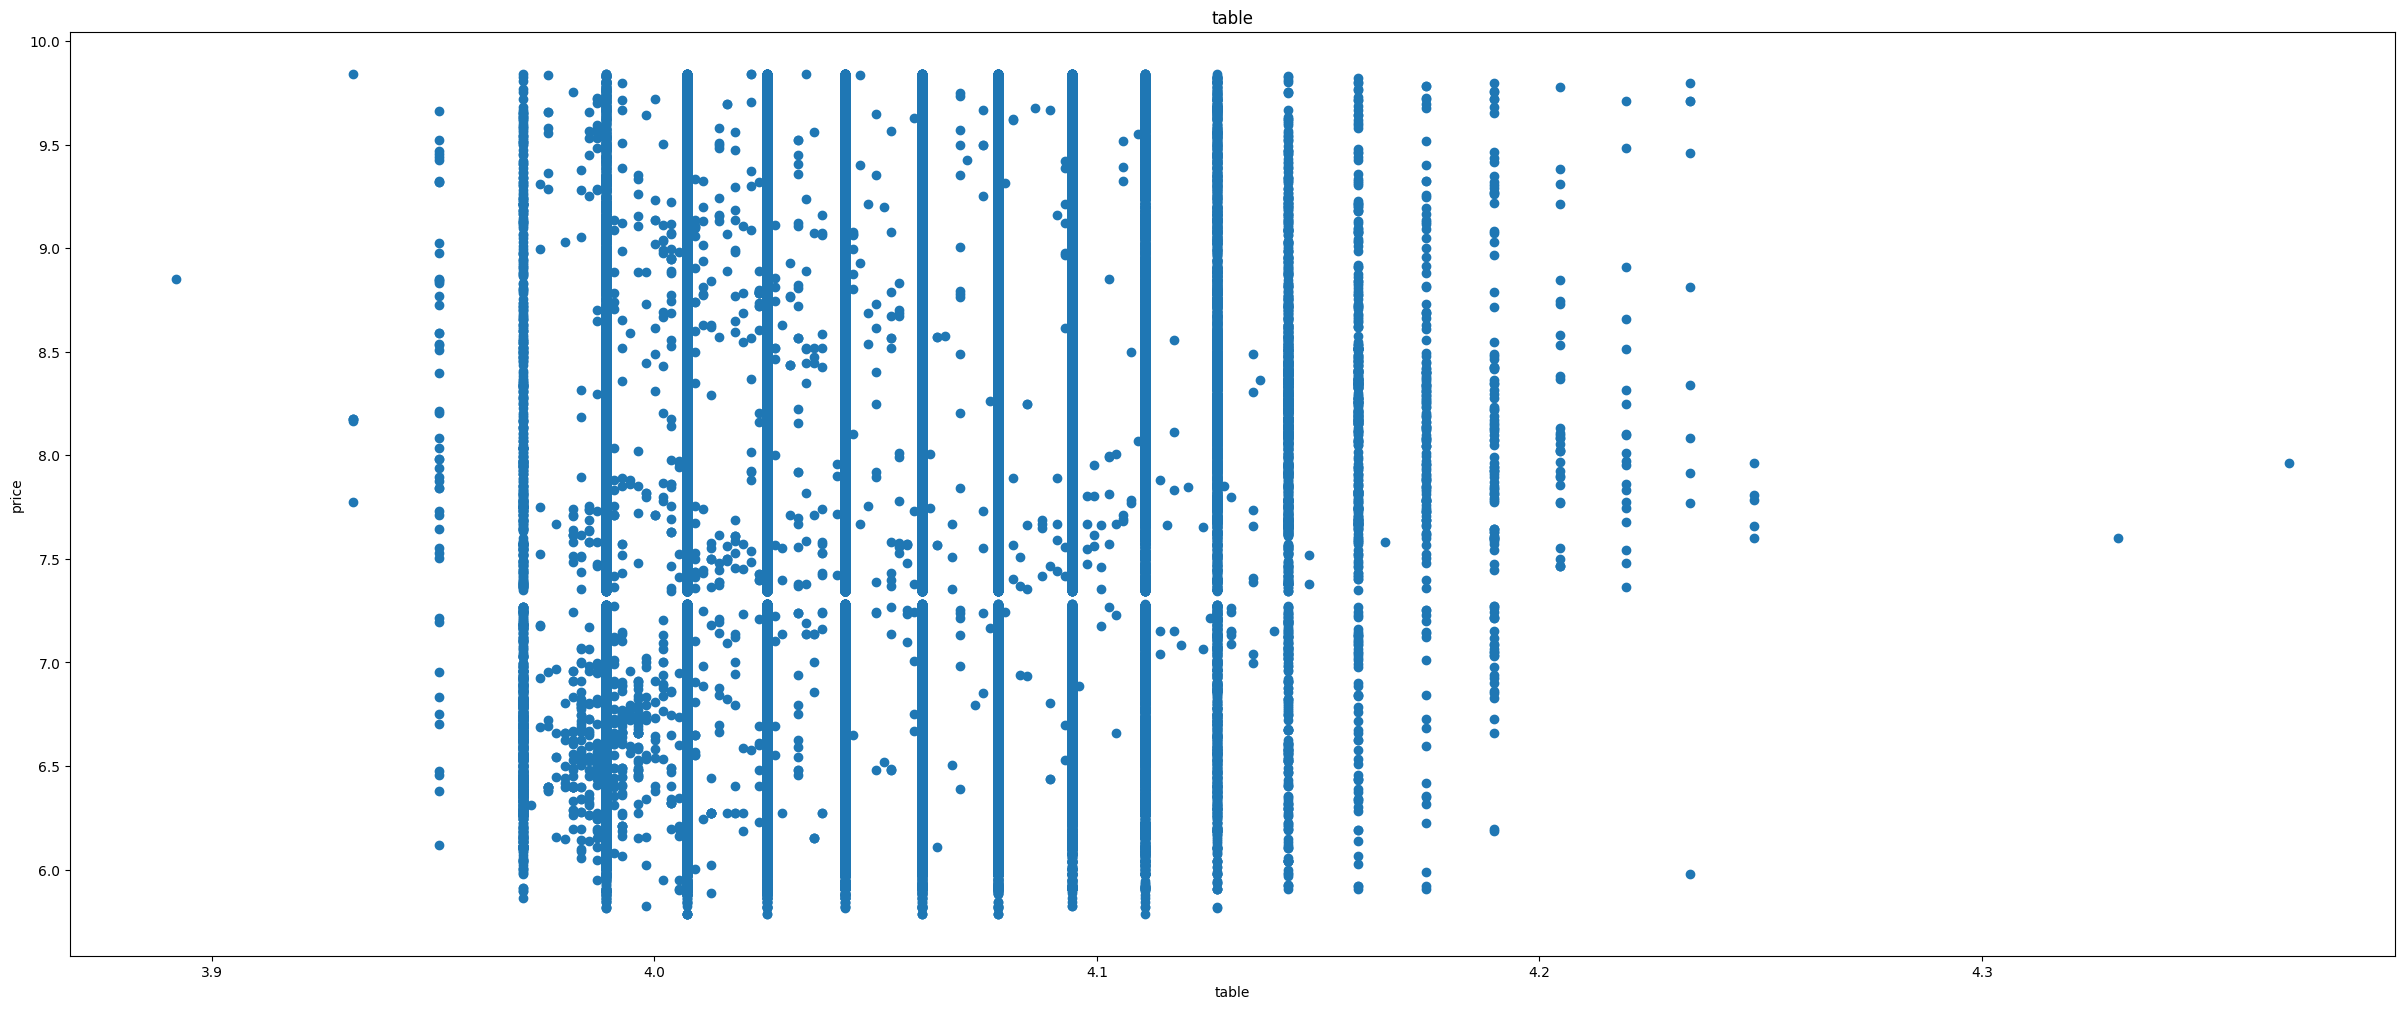

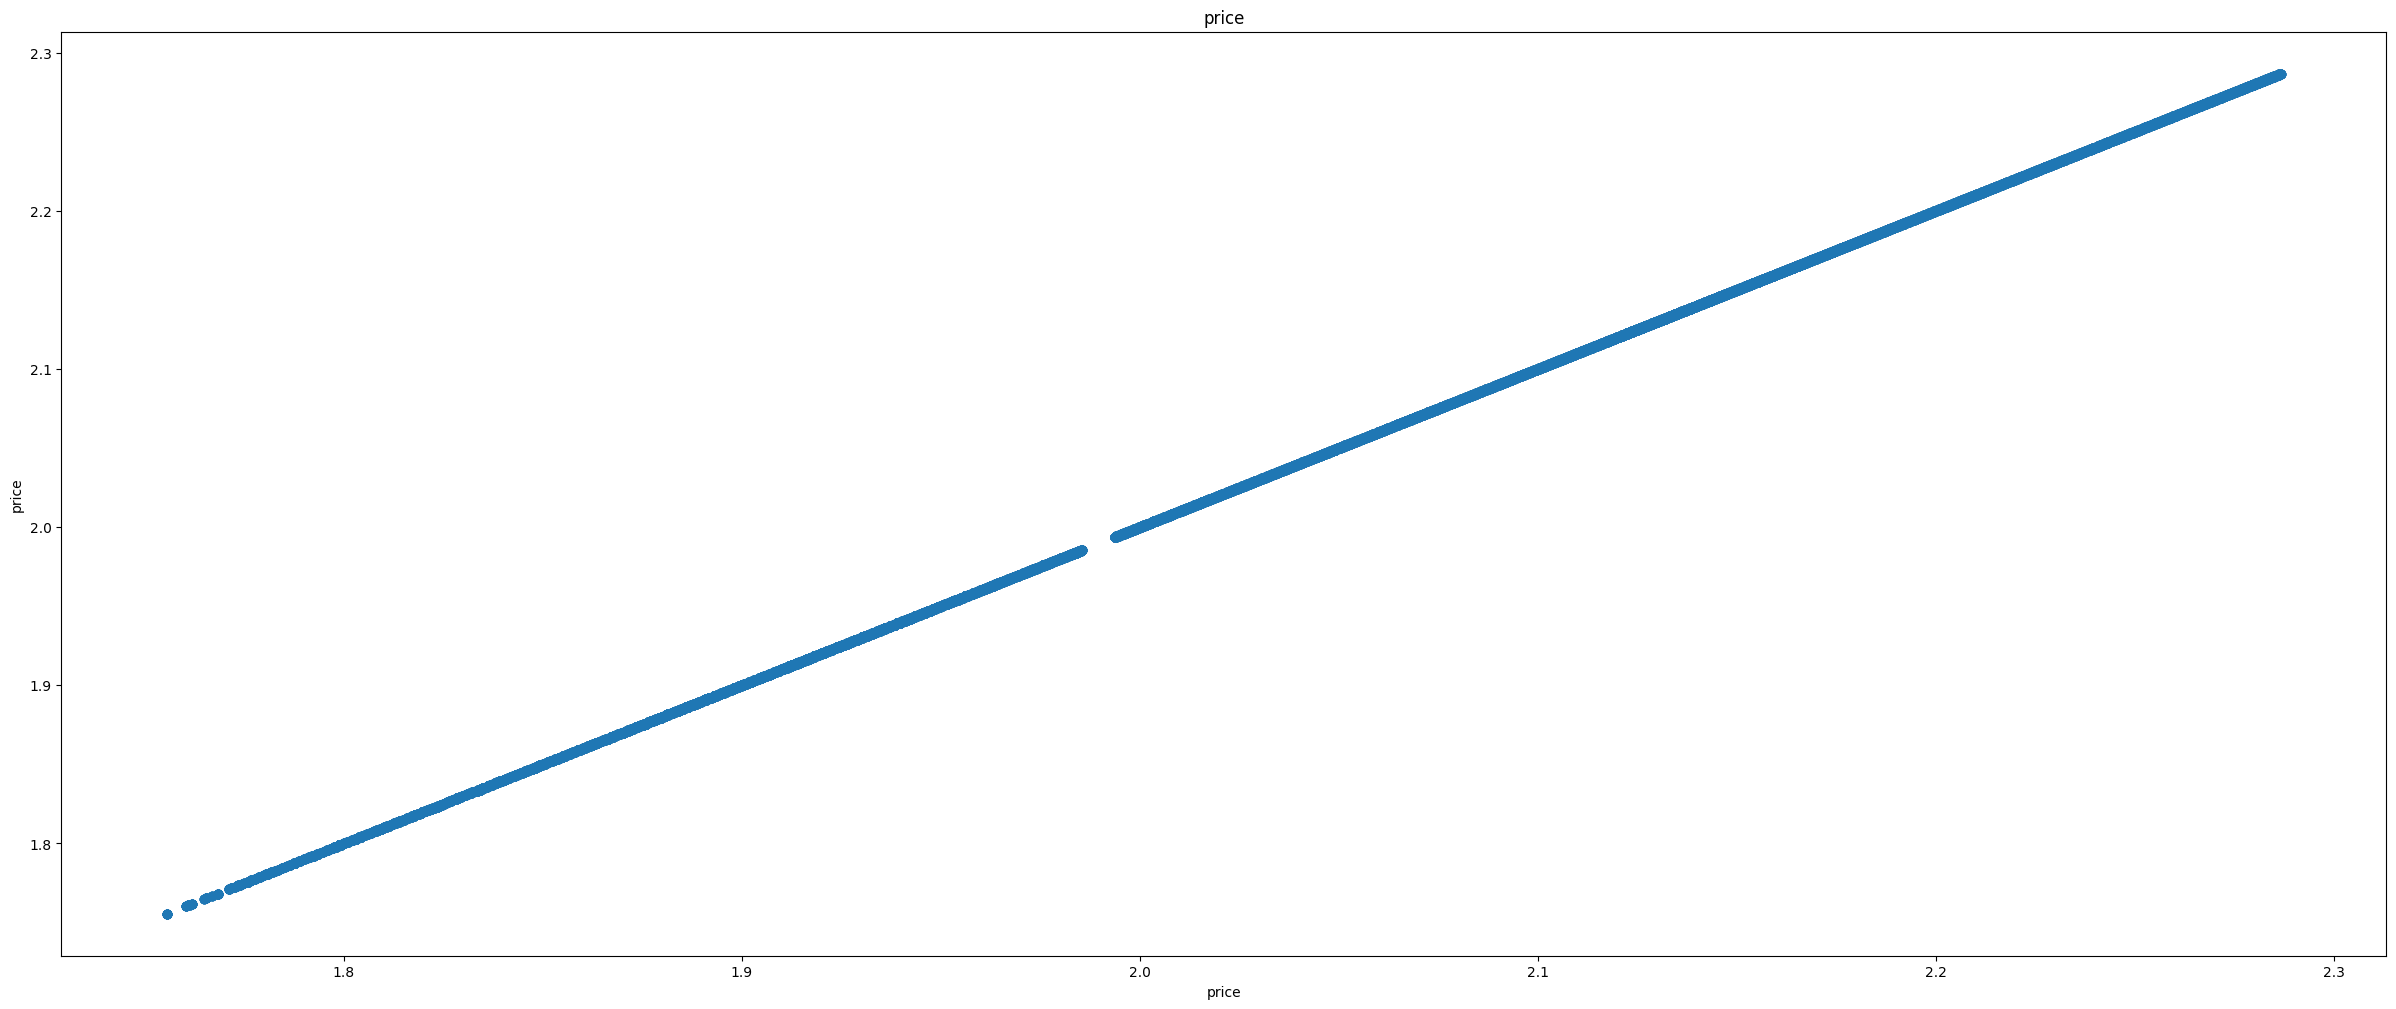

In [34]:
for feature in num_feature:
    df3=df2.copy()
    if 0 in df3[feature].unique():
        pass
    else:
        df3[feature]=np.log(df3[feature])
        df3['price']=np.log(df3['price'])
        plt.scatter(df3[feature],df3['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

### CHECKING OUTLIERS

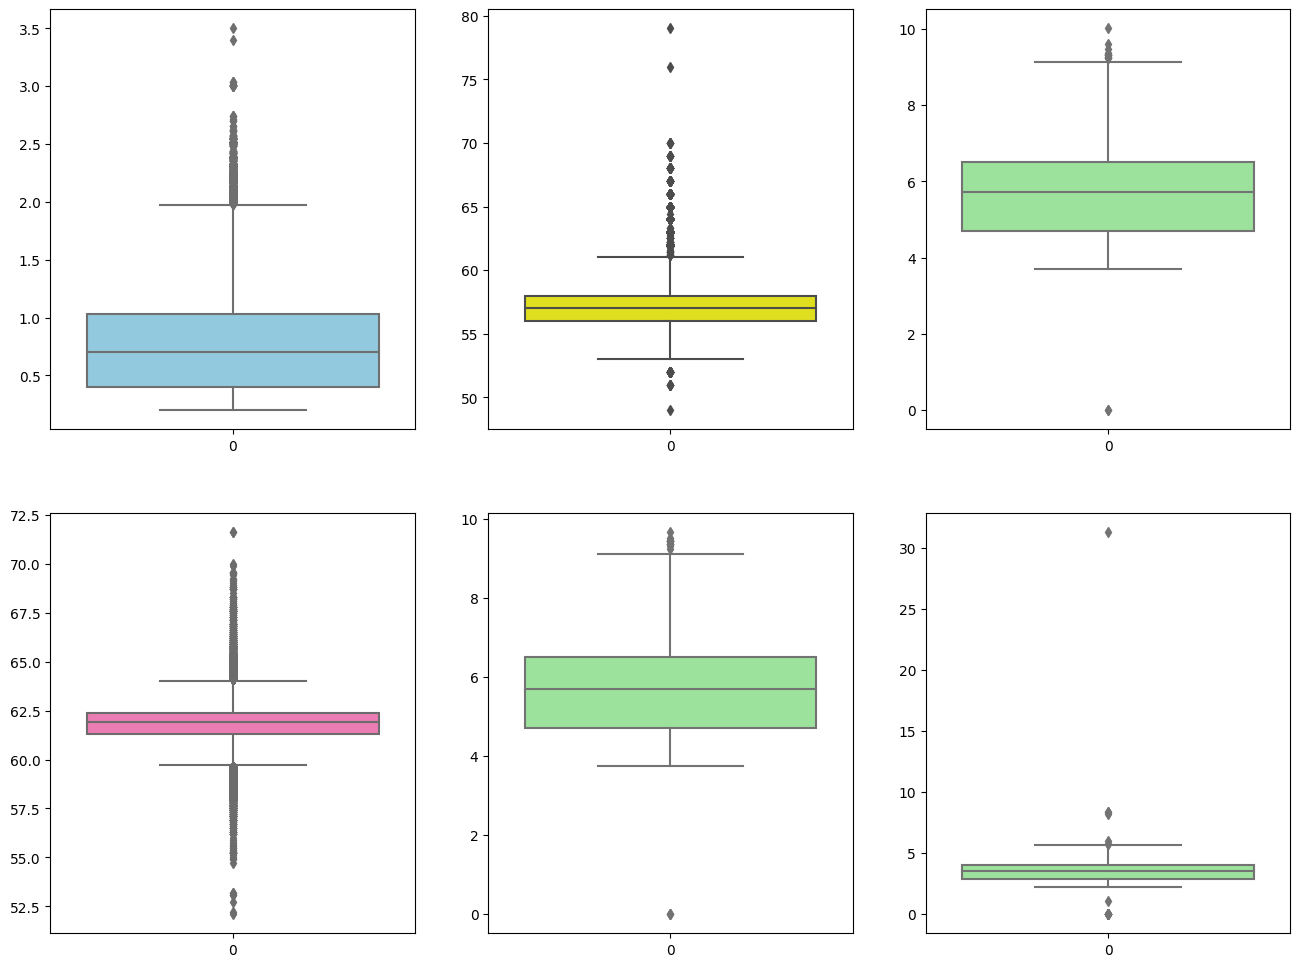

In [35]:
plt.subplots(2,3,figsize=(16,12))
plt.subplot(231)
sns.boxplot(df3['carat'],color='skyblue')
plt.subplot(234)
sns.boxplot(df3['depth'],color='hotpink')
plt.subplot(232)
sns.boxplot(df3['table'],color='yellow')
plt.subplot(235)
sns.boxplot(df3['x'],color='lightgreen')
plt.subplot(233)
sns.boxplot(df3['y'],color='lightgreen')
plt.subplot(236)
sns.boxplot(df3['z'],color='lightgreen')
plt.show()

In [36]:
## Removing outliers from carat feature which is a skewed data

IQR = df3['carat'].quantile(0.75)-df3['carat'].quantile(0.25)
lower_bridge = df3['carat'].quantile(0.25)- (IQR*1.5) # 1.5 depends on domain
upper_bridge = df3['carat'].quantile(0.75)+ (IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-0.545
1.975


In [37]:
df4=df3.copy()
df4.loc[df4.carat>1.97,'carat']=1.97

In [38]:
## Removing outliers from other numerical features which is a gaussian data

def remove_outliers(data,features):
    df=data.copy()
    upper_bound=[]
    lower_bound=[]
    for feature in features:
        upper_b= df[feature].mean() + 3*df[feature].std()
        lower_b= df[feature].mean() - 3*df[feature].std()
        upper_bound.append(upper_b)
        lower_bound.append(lower_b)
    return upper_bound,lower_bound
        

In [39]:
x,y=remove_outliers(df4,['depth','table','x','y','z'])

In [40]:
dict={
    'upper':[i for i in x],
    'lower':[i for i in y]
}
pd.DataFrame(dict)

,upper,lower
0,65.065687,58.575461
1,62.984208,51.471142
2,9.043579,2.387046
3,9.027095,2.413094
4,5.601013,1.467480


In [41]:
df4.loc[df4.depth>65.06,'depth']=65.06
df4.loc[df4.depth<=58.57,'depth']=58.57

df4.loc[df4.table>62.98,'table']=62.98
df4.loc[df4.table<=51.47,'table']=51.47

df4.loc[df4.x>9.04,'x']=9.04
df4.loc[df4.x<=2.38,'x']=2.38

df4.loc[df4.y>9.02,'y']=9.02
df4.loc[df4.y<=2.41,'y']=2.41

df4.loc[df4.z>5.60,'z']=5.60
df4.loc[df4.z<=1.46,'z']=1.46


In [42]:
df4.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,2.253313
1,1.97,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,2.251506
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2.070316
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,1.872001
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,2.259537


#### Conclusion
- price of the gemstones are mostly dependent on caret, x, y, and z features
- 

# Model Training

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [44]:
! pip install xgboost

In [45]:
df4.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,2.253313
1,1.97,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,2.251506
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2.070316
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,1.872001
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,2.259537


In [46]:
X=df4.drop('price',axis=1)
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,1.97,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [47]:
y=df4['price']
y

0         2.253313
1         2.251506
2         2.070316
3         1.872001
4         2.259537
            ...   
193568    1.950183
193569    2.074864
193570    2.081726
193571    1.875421
193572    2.044104
Name: price, Length: 193573, dtype: float64

In [48]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [49]:
X = preprocessor.fit_transform(X)

In [50]:
X.shape

(193573, 26)

In [51]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((154858, 26), (38715, 26))

In [52]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
     
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0186
- Mean Absolute Error: 0.0136
- R2 Score: 0.9802
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0184
- Mean Absolute Error: 0.0135
- R2 Score: 0.9804


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1318
- Mean Absolute Error: 0.1143
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1310
- Mean Absolute Error: 0.1135
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0186
- Mean Absolute Error: 0.0136
- R2 Score: 0.9802
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0184
- Mean Absolute Error: 0.0135
- R2 Score: 0.9804


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0144
- Mean Absolute Error: 0.0103
- R2 Score: 0.9881
----------------------

### Results

In [62]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.988877
6,XGBRegressor,0.988559
5,Random Forest Regressor,0.987355
3,K-Neighbors Regressor,0.982194
2,Ridge,0.980388
0,Linear Regression,0.980387
4,Decision Tree,0.975827
8,AdaBoost Regressor,0.906459
1,Lasso,-0.000001


#### Linear Regression

In [69]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.04


#### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

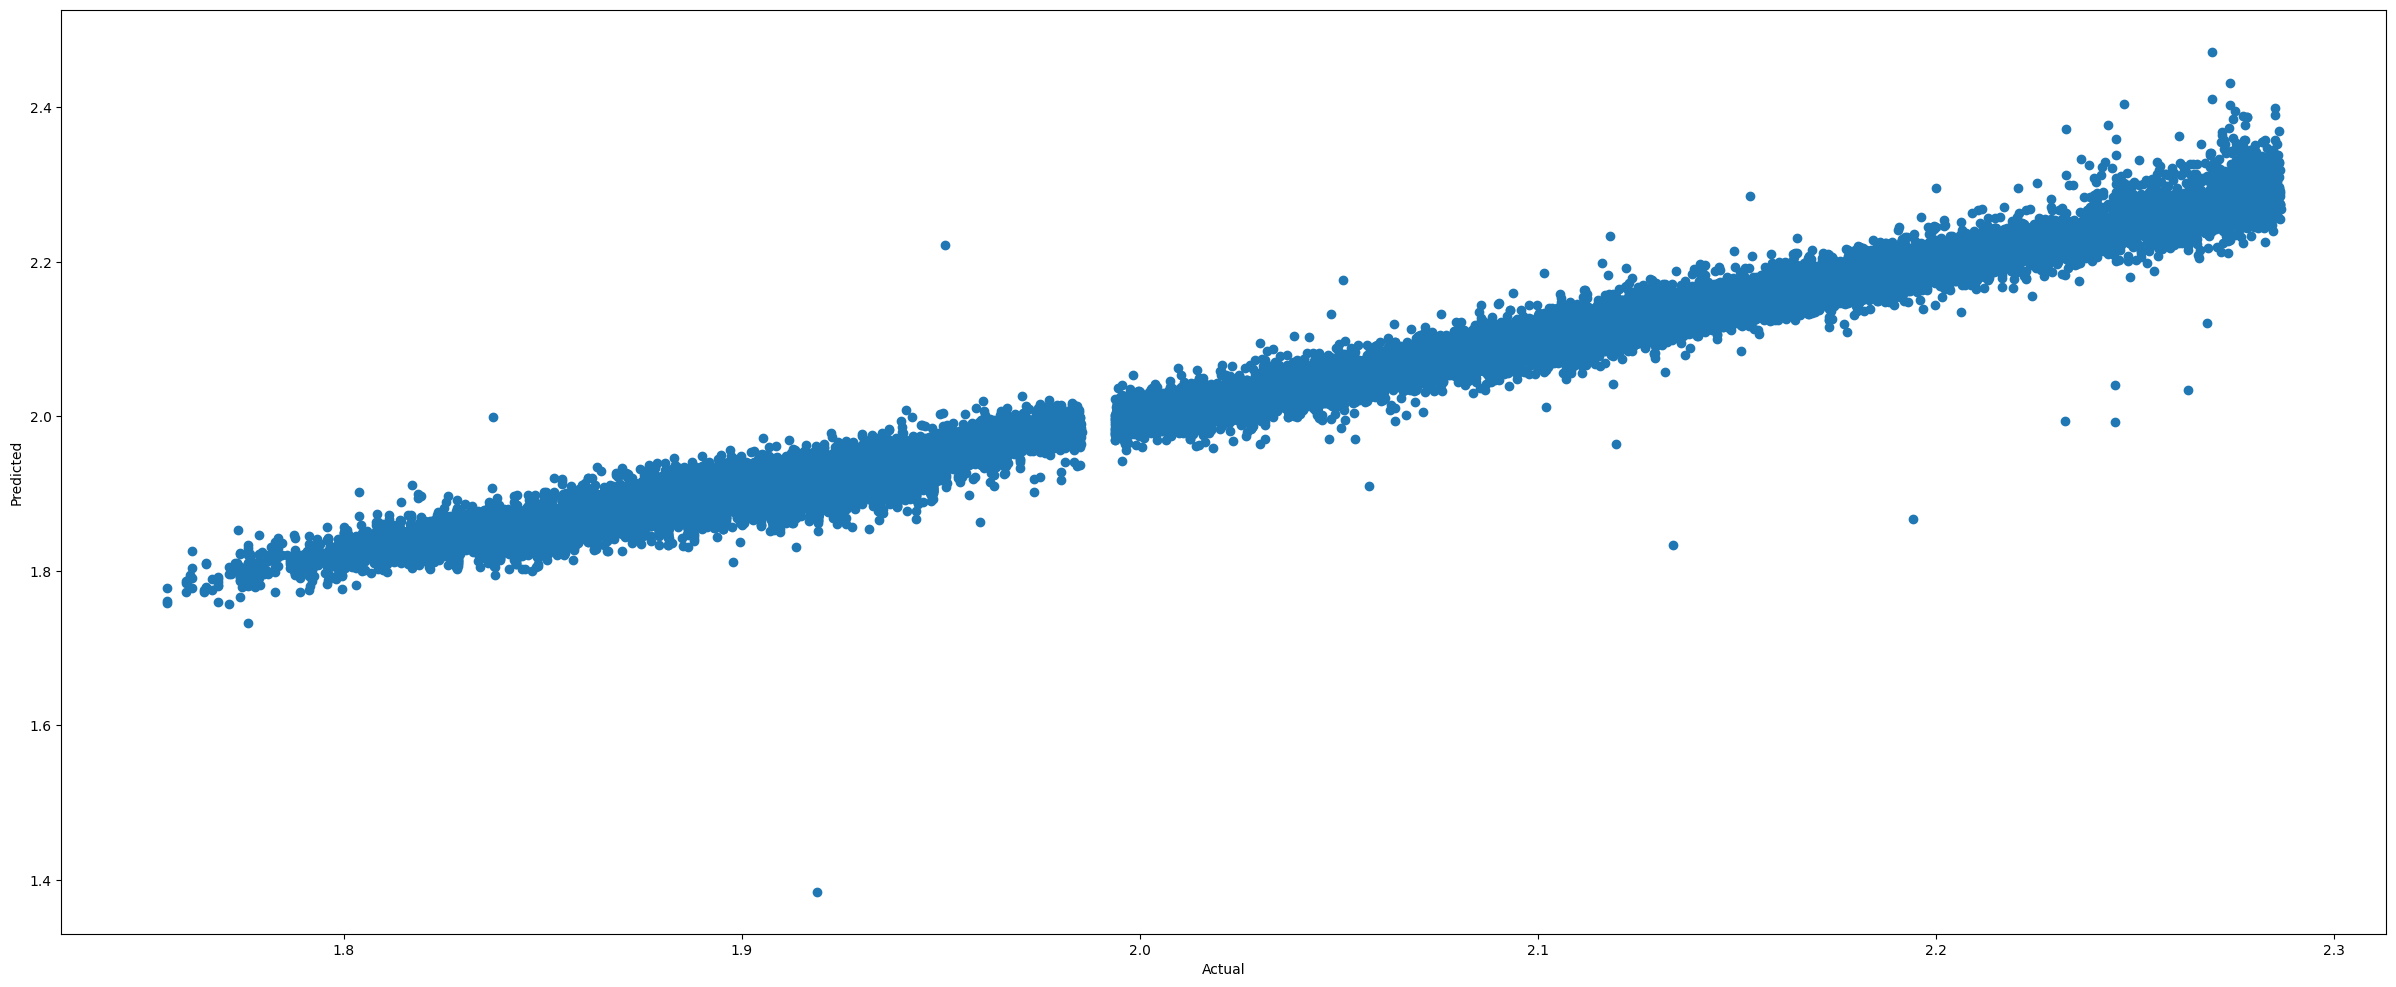

In [70]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='price'>

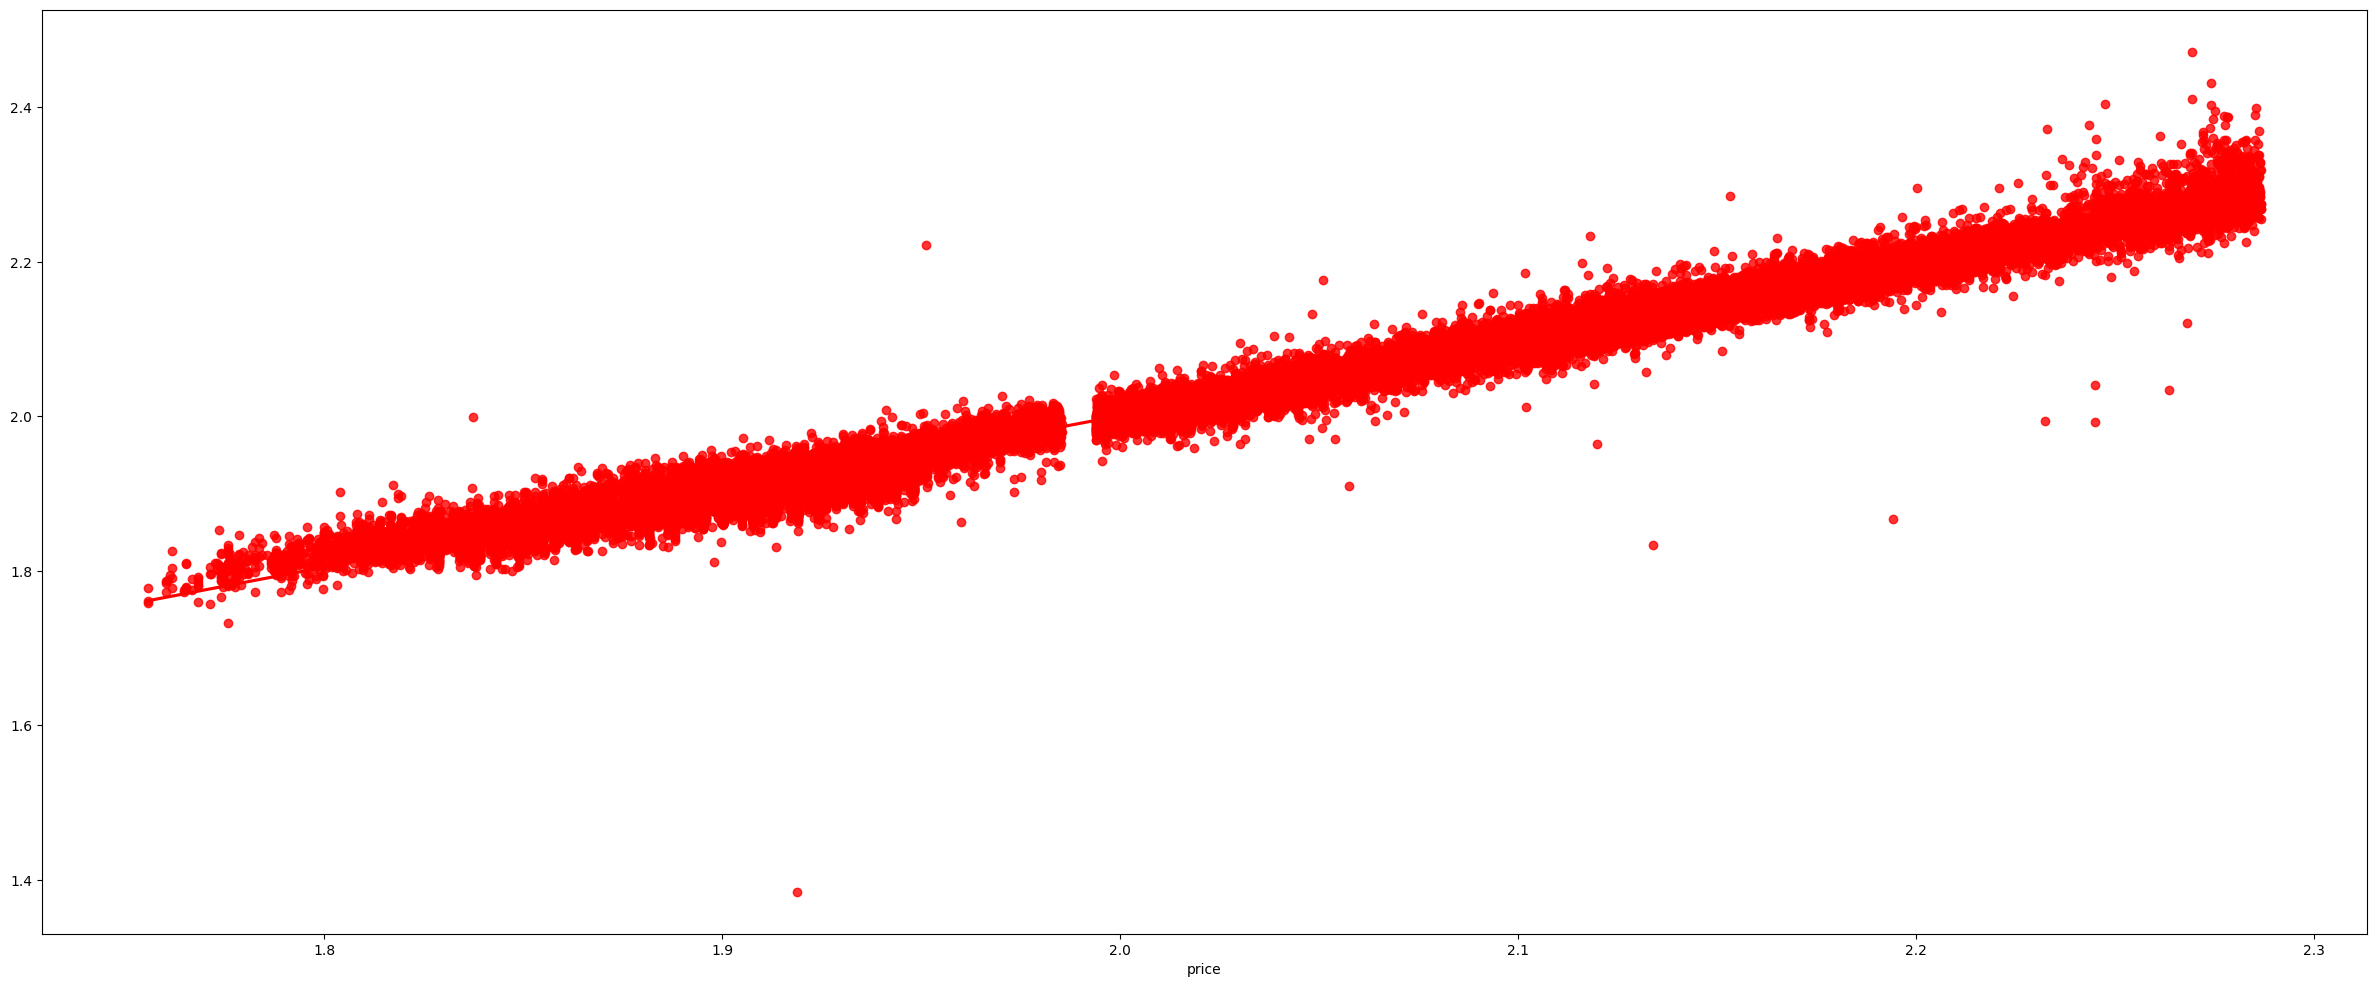

In [71]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [72]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
14868,1.975685,1.976463,-0.000778
165613,2.261241,2.240017,0.021224
96727,1.907786,1.869764,0.038021
145593,1.881148,1.880028,0.001120
118689,2.159303,2.165630,-0.006327
...,...,...,...
168548,2.111359,2.108227,0.003132
167333,1.886844,1.893488,-0.006644
113317,2.114021,2.107855,0.006166
25575,1.958343,1.972927,-0.014584


#### Insights
- CatBoost Regressor and XGBoost Regressor predicts the result by 98%